In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing dependicies
import os
import pandas as pd 
pd.set_option('display.max_columns', None)
from collections import Counter
import random
import numpy as np
import string
os.getcwd()

'/Users/manojchowdary/Documents/Data_903.01_Analytics_Applications2/Prashant_Project'

In [3]:
import keras
print(keras.__version__)

Using TensorFlow backend.


2.2.4


In [4]:
import cv2
from sklearn.utils import shuffle
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import pydot

In [5]:
# importing keras dependencies

from keras import models, layers
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import activations
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras import Sequential
import keras.utils as Utils

# To add Noise 
from keras.layers import GaussianNoise

# early stopping point
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Transfer learning
from keras.models import load_model

# Dropout regularisation
from keras.layers import Dropout

# Batch Normalization
from keras.layers import BatchNormalization

# Weight Intializers
from keras import initializers

# Optimizers
from keras.optimizers import SGD, RMSprop, Adam

In [6]:
from sklearn.metrics import confusion_matrix as CM
from random import randint
import matplotlib.gridspec as gridspec

In [7]:
import matplotlib.pyplot as plt

In [8]:
from skimage.data import imread
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
rd = random.randint(1, 1000000)
rd

655845

In [10]:
# To Extract Images
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'glacier':
            label = 2
        else:
            continue
        print(label)
        try:
            for image_file in os.listdir(directory + labels): #Extracting the file name of the image from Class Label folder
                image = cv2.imread(directory + labels + r'/'+image_file) #Reading the image (OpenCV)
                image = cv2.resize(image, (150, 150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
                Images.append(image)
                Labels.append(label)
        except:
            print(".DS_Store is not a Not a Directory")
    return shuffle(Images,Labels,random_state = rd) #Shuffle the dataset you just prepared.

In [11]:
# x = os.listdir('/Users/manojchowdary/Documents/Data_903.01_Analytics_Applications2/Prashant_Project/intel-image-classification/seg_train/' + 'glacier')
# im = cv2.imread('/Users/manojchowdary/Documents/Data_903.01_Analytics_Applications2/Prashant_Project/intel-image-classification/seg_train/' + 'glacier' + r'/' + '10.jpg')
# im = cv2.resize(im, (150, 150))
# plt.imshow(im)

In [11]:
# Getting Labels
def get_classlabel(class_code):
    labels = {0:'buildings', 1:'forest', 2:'glacier'}
    return labels[class_code]

In [12]:
# # Extracting train Images
Images, Labels = get_images('/Users/manojchowdary/Documents/Data_903.01_Analytics_Applications2/Prashant_Project/intel-image-classification/seg_train/') #Extract the training images from the folders.
Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

1
0
2


In [61]:
Images[0][0][0]

array([46, 81, 77], dtype=uint8)

In [13]:
print(len(Images))
Labels

6866


array([1, 2, 0, ..., 1, 2, 2])

In [14]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (6866, 150, 150, 3)
Shape of Labels: (6866,)


In [15]:
# Extracting test Images
test_images,test_labels = get_images('/Users/manojchowdary/Documents/Data_903.01_Analytics_Applications2/Prashant_Project/intel-image-classification/seg_test/')
test_images = np.array(test_images)
test_labels = np.array(test_labels)

1
0
2


In [16]:
print("Shape of Images:",test_images.shape)
print("Shape of Labels:",test_labels.shape)

Shape of Images: (1464, 150, 150, 3)
Shape of Labels: (1464,)


# ANN

In [17]:
# Reshaping Images
train_images = Images.reshape((6866, 150 * 150 * 3))
train_images = train_images.astype('float32') / 255
test_images_v2 = test_images.reshape((1464, 150 * 150 * 3)) 
test_images_v2 = test_images_v2.astype('float32') / 255

In [18]:
len(test_images[0])

150

In [19]:
# convert labels to categorical (Data structure transformation)
# Converts a class vector (integers) to binary class matrix
# E.g. for use with categorical_crossentropy.

# ------------------------------------
# Caution: Run this cell only once
# ------------------------------------

from keras.utils import to_categorical

Train_labels = to_categorical(Labels)
Test_labels = to_categorical(test_labels)

print(Train_labels.shape)
print(Test_labels.shape)
Train_labels[2][1]

(6866, 3)
(1464, 3)


0.0

In [20]:
Train_labels

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [21]:
# Hyper Parameters
BN = ["Yes", "No"]

DR = []

for i in range(0, 11):
    i = round(i*0.1, 1)
    DR.append(i)

Epochs = []
for j in range(1, 6):
    j = j*10
    Epochs.append(j)

optimizers = ["Sgd", "Rmsprop", "Adam"]

Gaussian_Noise = []

for gn in range(1,4):
    gn = round(gn*0.1, 1)
    Gaussian_Noise.append(gn)

Weight_intializers = ["Xavier uniform", "Xavier normal", "He uniform", "He normal"]

In [22]:
# A function to randomly plug in different hyperparameters and to run the model

def param(Batch_Norm, Dropout, epochs, opti, weight_int, gas_nos):
    print("Batch Normalization Decisions: ")
    print()
    
    for k in Batch_Norm:
        print(k, end = ", ")
    
    Correct = False
    
    while(Correct == False):
        print("\n")
        Batch_des = random.choice(Batch_Norm)
        print("Batch Normalization: ", Batch_des)
        if Batch_des in Batch_Norm:
            Batch_des = Batch_des
            Correct = True
        else:
            print("Select from the listed values only ")
    print()
    print("Dropout ratio values")
    print()
    for l in Dropout:
        print(l, end = ", ")
            
    Correct2 = False
    while(Correct2 == False):
        try:
            print()
            Dropout_ratio = random.choice(Dropout)
            print("Dropout rate: ", Dropout_ratio)
            if Dropout_ratio in Dropout:
                Dropout_ratio = Dropout_ratio
                Correct2 = True
        except ValueError:
            print()
            print("Select the Droupout ratio from the specified range")
    print()
    print("Epoch values: ")
    print()
    
    for m in epochs:
        print(m, end = ", ")
        
    Correct3 = False
    while(Correct3 == False):
        try:
            print()
            epoch_val = random.choice(epochs)
            print("Number of epochs: ",epoch_val)
            if epoch_val in epochs:
                epoch_val = epoch_val
                Correct3 = True
        except ValueError:
            print()
            print("Select the number of Epochs from the specified range")

    print()
    print("Optimizers: ")
    print()
    
    for n in opti:
        print(n, end = ", ")
        
    Correct4 = False
    
    while(Correct4 == False):
        print("\n")
        Optimizer = random.choice(opti)
        print("Optimizer: ",Optimizer)
        if Optimizer in opti:
            Optimizer = Optimizer.lower()
            Correct4 = True
        else:
            print("Select from the listed values only ")
    print()
    print("Weight Intializers: ")
    print()
    
    for o in weight_int:
        print(o, end = ", ")
        
    Correct5 = False
    
    while(Correct5 == False):
        print("\n")
        weight = random.choice(weight_int)
        print("Weight Intializer: ",weight)
        if weight in weight_int:
            weight = weight.lower()
            Correct5 = True
        else:
            print("Select from the listed values only ")
    print()        
    Gas_Nos = ['Yes', 'No']
    
    des = random.choice(Gas_Nos)
    
    print(des)
    print()
    
    if des == "Yes":
        print("Gaussian Noise Values:")
        print()
    
        for p in gas_nos:
            print(p, end = ", ")
        
        Correct6 = False
    
        while(Correct6 == False):
            print("\n")
            g_n = random.choice(gas_nos)
            print("Gaussian Noise: ",g_n)
            if g_n in gas_nos:
                g_n = g_n
                Correct6 = True
            else:
                print("Select from the listed values only ")
    else:
        g_n = 0.0
    
    return Batch_des, Dropout_ratio, epoch_val, Optimizer, weight, g_n, des

In [23]:
# To run the model with best hyperparameters

def best_param(Batch_Norm, Dropout, epochs, opti, weight_int, gas_nos):
    print("Batch Normalization Decisions: ")
    print()
    
    for k in Batch_Norm:
        print(k, end = ", ")
    
    Correct = False
    
    while(Correct == False):
        print("\n")
        Batch_des = input("Select Batch Normalization: ")
        Batch_des = Batch_des.capitalize()
        print("\n")
        if Batch_des in Batch_Norm:
            Batch_des = Batch_des
            Correct = True
        else:
            print("Select from the listed values only ")
    print("\n")
    
    print("Dropout ratio values")
    print()
    for l in Dropout:
        print(l, end = ", ")
            
    Correct2 = False
    while(Correct2 == False):
        try:
            print()
            Dropout_ratio = float(input("Select Dropout ratio in range 0.1 and 1: "))
            if Dropout_ratio in Dropout:
                Dropout_ratio = Dropout_ratio
                Correct2 = True
        except ValueError:
            print()
            print("Select the Droupout ratio from the specified range")
    print("\n")
    
    print("Epoch values: ")
    print()
    
    for m in epochs:
        print(m, end = ", ")
        
    Correct3 = False
    while(Correct3 == False):
        try:
            print()
            epoch_val = int(input("Select the number of Epochs in range 1 and 100: "))
            if epoch_val in epochs:
                epoch_val = epoch_val
                Correct3 = True
        except ValueError:
            print()
            print("Select the number of Epochs from the specified range")
    print("\n")
    
    print("Optimizers: ")
    print()
    
    for n in opti:
        print(n, end = ", ")
        
    Correct4 = False
    
    while(Correct4 == False):
        print("\n")
        Optimizer = input("Select Optimizer: ")
        Optimizer = Optimizer.capitalize()
        print("\n")
        if Optimizer in opti:
            Optimizer = Optimizer.lower()
            Correct4 = True
        else:
            print("Select from the listed values only ")
            
    print("\n")
    
    print("Weight Intializers: ")
    print()
    
    for o in weight_int:
        print(o, end = ", ")
        
    Correct5 = False
    
    while(Correct5 == False):
        print("\n")
        weight = input("Select Weight Intailizer: ")
        weight = weight.capitalize()
        print("\n")
        if weight in weight_int:
            weight = weight.lower()
            Correct5 = True
        else:
            print("Select from the listed values only ")
    
    print("\n")
    
    Gas_Nos = ['Yes', 'No']
    
    print("Gaussian Noise:")
    print()
    for gsn in Gas_Nos:
        print(gsn, end = ", ")
    
    
    Nos_correct = False
    
    while(Nos_correct == False):
        des = input("Add Gaussian Noise: ")
        des = des.capitalize()
        if des in Gas_Nos:
            if des == "Yes":
                print("Gaussian Noise Values:")
                print()
                for p in gas_nos:
                    print(p, end = ", ")
        
                Correct6 = False
    
                while(Correct6 == False):
                    try:
                        print("\n")
                        g_n = float(input("Enter Gaussian Noise: "))
                        print("Gaussian Noise: ",g_n)
                        if g_n in gas_nos:
                            g_n = g_n
                            Correct6 = True
                    except:
                        print("Select from the listed values only ")
            else:
                g_n = 0.0
                print("Gaussian Noise: ",g_n)
            Nos_correct = True
        else:
            print("Select from the listed values only")
    
    return Batch_des, Dropout_ratio, epoch_val, Optimizer, weight, g_n, des

In [24]:
# Building the model and saving the results to dataframe
def intel_model(train_img, train_lab, test_img, test_lab, df):
    
    Batch_Norm_Des, Drop_ratio, epoc, Optimizer, weight_intializer, Gauss_Noise, Noise_des = param(BN, DR, Epochs, optimizers, Weight_intializers, Gaussian_Noise)
    print("\n")
    
    print("Batch Normalization Decison:", Batch_Norm_Des, ", ", 
          "Dropout Ratio:", Drop_ratio, ", ", "Number of Epochs:", epoc, ", ",
          "Optimizer:", Optimizer, ", ", "Weight_intializer:", weight_intializer, ", "
          "Gaussian_Noise:", Gauss_Noise, end = " ")
    
    model = Sequential()
    
    # Input layer
    Input_acti = 'relu'
    model.add(layers.Dense(10, activation= Input_acti, input_shape=(150* 150* 3,)))
    
    # adding dropouts to layer on hidden layer 1
    model.add(Dropout(Drop_ratio))
    
    # gaussian nosie to hidden layer
    
    if Noise_des == "Yes":
        model.add(GaussianNoise(Gauss_Noise))
    
    # Batch Normalization to hidden layer 1
    if Batch_Norm_Des == "Yes":
        model.add(BatchNormalization())
    
    Activation1 = 'relu'
    
    if weight_intializer == "he uniform":
        model.add(Dense(10, activation = Activation1, kernel_initializer = 'he_uniform'))
    elif weight_intializer == "he normal":
        model.add(Dense(10, activation = Activation1, kernel_initializer = 'he_normal'))
    elif weight_intializer == "xavier uniform":
        model.add(Dense(10, activation = Activation1, kernel_initializer = 'glorot_uniform'))
    else:
        model.add(Dense(10, activation = Activation1, kernel_initializer = 'glorot_normal'))
    
    # Hidden layer 2
    
    Activation2 = 'relu'
    model.add(layers.Dense(10, activation = Activation2))
    
    # adding dropouts to layer on hidden layer 3
    model.add(Dropout(Drop_ratio))
    
    # Hidden layer 3
    
    Activation3 = 'relu'
    model.add(layers.Dense(10, activation = Activation3))
    
    # Output layer
    
    Output_Activation = 'softmax'
    model.add(layers.Dense(3, activation = Output_Activation))
    
    # Optimizers
    if Optimizer == 'sgd':
        opti = SGD(lr = 0.001)
    elif Optimizer == 'rmsprop':
        opti = RMSprop(lr = 0.00001)
    else:
        opti = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)
    
    # Compile the model
    model.compile(optimizer = opti, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Early stopping point
    EarlyStop = [EarlyStopping(monitor='val_loss', patience = epoc-4, min_delta = 0.05, mode = min)]
    
    
    # Fitting the model
    hist = model.fit(train_img, train_lab, epochs=epoc, batch_size=32, 
                             validation_data = (test_img, test_lab),
                            callbacks = EarlyStop)
    
#     width = 3
    
#     depth = 

    def data(Input_Act, Act1, Act2, Act3, Output_Act, Drop_rate, Gau_Noi, Bat_Norm, weg_int, optimiz, 
             data, epc, tr_l, tst_l, tr_ac, tst_ac):
        
        Data_Frame = pd.DataFrame([[Input_Act, Act1, Act2, Act3, Output_Act, 
                                    Drop_rate, Gau_Noi, Bat_Norm, weg_int, optimiz, 
                                    epc, tr_l, tst_l, tr_ac, tst_ac]], 
                                  columns = ["Input_Activation", "Activation1", "Activation2", 
                                            "Activation3", "Output_Activation", "Dropout rate", 
                                                   "Gaussian Noise", "Batch_Normalization", "Weight_Intializer", 
                                                  "Optimizer", "epochs", "Train_loss", "Test_loss", "Train_Accuracy",
                                                  "Test_Accuracy"])
        df = pd.concat([data, Data_Frame])
        return df
    
    Train_loss, Train_Acc = model.evaluate(train_img, train_lab, verbose=0)
    Test_loss, Test_Acc = model.evaluate(test_img, test_lab, verbose=0)
    
    print("Training data Evaluation")
    print(model.evaluate(train_img, train_lab))
    print()
    print("Testing data Evaluation")
    print(model.evaluate(test_img, test_lab))
    
    Model_Data_Frame = data(Input_acti, Activation1, Activation2, Activation3, Output_Activation, 
                            Drop_ratio, Gauss_Noise, Batch_Norm_Des, weight_intializer, Optimizer, 
                            df, epoc, Train_loss, Test_loss, Train_Acc, Test_Acc)
    
    Model_Data_Frame_V2 = Model_Data_Frame.reset_index().drop(["index"], axis = 1)
    print()
    
    return model, hist, Model_Data_Frame_V2

In [25]:
# Building the best model

def best_intel_model(train_img, train_lab, test_img, test_lab):
    Batch_Norm_Des, Drop_ratio, epoc, Optimizer, weight_intializer, Gauss_Noise, Noise_des = best_param(BN, DR, Epochs, optimizers, Weight_intializers, Gaussian_Noise)
    print()
    print("Batch Normalization Decison:", Batch_Norm_Des, ", ", 
          "Dropout Ratio:", Drop_ratio, ", ", "Number of Epochs:", epoc, ", ",
          "Optimizer:", Optimizer, ", ", "Weight_intializer:", weight_intializer, ", "
          "Gaussian_Noise:", Gauss_Noise, end = " ")
    print("\n")
    
    model = Sequential()
    
    # Input layer
    Input_acti = 'relu'
    model.add(layers.Dense(10, activation= Input_acti, input_shape=(150* 150* 3,)))
    
    # adding dropouts to layer on hidden layer 1
    model.add(Dropout(Drop_ratio))
    
    # gaussian nosie to hidden layer
    if Noise_des == "Yes":
        model.add(GaussianNoise(Gauss_Noise))
    
    # Batch Normalization to hidden layer 1
    if Batch_Norm_Des == "Yes":
        model.add(BatchNormalization())
    
    Activation1 = 'relu'
    
    if weight_intializer == "he uniform":
        model.add(Dense(10, activation = Activation1, kernel_initializer = 'he_uniform'))
    elif weight_intializer == "he normal":
        model.add(Dense(10, activation = Activation1, kernel_initializer = 'he_normal'))
    elif weight_intializer == "xavier uniform":
        model.add(Dense(10, activation = Activation1, kernel_initializer = 'glorot_uniform'))
    else:
        model.add(Dense(10, activation = Activation1, kernel_initializer = 'glorot_normal'))
    
    # Hidden layer 2
    
    Activation2 = 'relu'
    model.add(layers.Dense(10, activation = Activation2))
    
    # adding dropouts to layer on hidden layer 3
    model.add(Dropout(Drop_ratio))
    
    # Hidden layer 3
    
    Activation3 = 'relu'
    model.add(layers.Dense(10, activation = Activation3))
    
    # Output layer
    
    Output_Activation = 'softmax'
    model.add(layers.Dense(3, activation = Output_Activation))
    
    # Optimizers
    if Optimizer == 'sgd':
        opti = SGD(lr = 0.0001)
    elif Optimizer == 'rmsprop':
        opti = RMSprop(lr = 0.00001)
    else:
        opti = Adam(lr = 0.0001, beta_1 = 0.9, beta_2 = 0.999)
    
    # Compile the model
    model.compile(optimizer = opti, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Early stopping point
    EarlyStop = [EarlyStopping(monitor='val_loss', patience = epoc-4, min_delta = 0.05, mode = min),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]
    
    
    # Fitting the model
    hist = model.fit(train_img, train_lab, epochs=epoc, batch_size=32, 
                             validation_data = (test_img, test_lab),
                            callbacks = EarlyStop)
    
    print("Training data Evaluation")
    print(model.evaluate(train_img, train_lab))
    print()
    print("Testing data Evaluation")
    print(model.evaluate(test_img, test_lab))
    
    return model, hist

In [53]:
# Model_Report = pd.DataFrame()

In [54]:
for i in range(1, 251):
    Model, Model_hist, Model_Report =  intel_model(train_images, Train_labels, test_images_v2, Test_labels, Model_Report)
    print("Models Completed:", i)
    print()

Batch Normalization Decisions: 

Yes, No, 

Batch Normalization:  Yes

Dropout ratio values

0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
Dropout rate:  0.8

Epoch values: 

10, 20, 30, 40, 50, 
Number of epochs:  40

Optimizers: 

Sgd, Rmsprop, Adam, 

Optimizer:  Rmsprop

Weight Intializers: 

Xavier uniform, Xavier normal, He uniform, He normal, 

Weight Intializer:  He uniform

No



Batch Normalization Decison: Yes ,  Dropout Ratio: 0.8 ,  Number of Epochs: 40 ,  Optimizer: rmsprop ,  Weight_intializer: he uniform , Gaussian_Noise: 0.0 Train on 6866 samples, validate on 1464 samples
Epoch 1/40
6866/6866 [==============================] - 5s 667us/step - loss: 1.1069 - acc: 0.3528 - val_loss: 1.0982 - val_acc: 0.3238
Epoch 2/40
6866/6866 [==============================] - 3s 392us/step - loss: 1.0947 - acc: 0.3450 - val_loss: 1.0973 - val_acc: 0.3777
Epoch 3/40
6866/6866 [==============================] - 2s 363us/step - loss: 1.0981 - acc: 0.3501 - val_loss: 1.0962 - va

Epoch 13/20
6866/6866 [==============================] - 2s 305us/step - loss: 0.7734 - acc: 0.7351 - val_loss: 0.7515 - val_acc: 0.7466
Epoch 14/20
6866/6866 [==============================] - 2s 313us/step - loss: 0.7559 - acc: 0.7504 - val_loss: 0.7603 - val_acc: 0.7336
Epoch 15/20
6866/6866 [==============================] - 2s 303us/step - loss: 0.7342 - acc: 0.7639 - val_loss: 0.7333 - val_acc: 0.7671
Epoch 16/20
6866/6866 [==============================] - 2s 311us/step - loss: 0.7125 - acc: 0.7776 - val_loss: 0.7260 - val_acc: 0.7384
Epoch 17/20
6866/6866 [==============================] - 2s 304us/step - loss: 0.6935 - acc: 0.7826 - val_loss: 0.6963 - val_acc: 0.7643
Epoch 18/20
6866/6866 [==============================] - 2s 300us/step - loss: 0.6813 - acc: 0.7868 - val_loss: 0.7084 - val_acc: 0.7766
Epoch 19/20
6866/6866 [==============================] - 2s 301us/step - loss: 0.6575 - acc: 0.7890 - val_loss: 0.6803 - val_acc: 0.7678
Epoch 20/20
6866/6866 [==================

Epoch 10/20
6866/6866 [==============================] - 2s 348us/step - loss: 0.7188 - acc: 0.6676 - val_loss: 0.6321 - val_acc: 0.7165
Epoch 11/20
6866/6866 [==============================] - 2s 357us/step - loss: 0.7028 - acc: 0.6738 - val_loss: 0.6699 - val_acc: 0.6783
Epoch 12/20
6866/6866 [==============================] - 2s 347us/step - loss: 0.6928 - acc: 0.6794 - val_loss: 0.6753 - val_acc: 0.6947
Epoch 13/20
6866/6866 [==============================] - 2s 349us/step - loss: 0.6808 - acc: 0.6874 - val_loss: 0.6701 - val_acc: 0.6954
Epoch 14/20
6866/6866 [==============================] - 2s 348us/step - loss: 0.6783 - acc: 0.6902 - val_loss: 0.7150 - val_acc: 0.5430
Epoch 15/20
6866/6866 [==============================] - 2s 348us/step - loss: 0.6673 - acc: 0.6976 - val_loss: 0.9501 - val_acc: 0.4734
Epoch 16/20
6866/6866 [==============================] - 2s 349us/step - loss: 0.6626 - acc: 0.7020 - val_loss: 0.7605 - val_acc: 0.5478
Epoch 17/20
6866/6866 [==================

0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
Dropout rate:  0.2

Epoch values: 

10, 20, 30, 40, 50, 
Number of epochs:  10

Optimizers: 

Sgd, Rmsprop, Adam, 

Optimizer:  Adam

Weight Intializers: 

Xavier uniform, Xavier normal, He uniform, He normal, 

Weight Intializer:  He normal

No



Batch Normalization Decison: Yes ,  Dropout Ratio: 0.2 ,  Number of Epochs: 10 ,  Optimizer: adam ,  Weight_intializer: he normal , Gaussian_Noise: 0.0 Train on 6866 samples, validate on 1464 samples
Epoch 1/10
6866/6866 [==============================] - 5s 758us/step - loss: 0.9700 - acc: 0.5045 - val_loss: 0.7385 - val_acc: 0.7254
Epoch 2/10
6866/6866 [==============================] - 3s 390us/step - loss: 0.7433 - acc: 0.6688 - val_loss: 0.7253 - val_acc: 0.6469
Epoch 3/10
6866/6866 [==============================] - 3s 387us/step - loss: 0.6945 - acc: 0.7008 - val_loss: 0.7064 - val_acc: 0.6851
Epoch 4/10
6866/6866 [==============================] - 3s 410us/step - loss: 0.6784 - 

Batch Normalization Decison: No ,  Dropout Ratio: 0.1 ,  Number of Epochs: 40 ,  Optimizer: sgd ,  Weight_intializer: he uniform , Gaussian_Noise: 0.0 Train on 6866 samples, validate on 1464 samples
Epoch 1/40
6866/6866 [==============================] - 4s 633us/step - loss: 0.9872 - acc: 0.5128 - val_loss: 0.9539 - val_acc: 0.5792
Epoch 2/40
6866/6866 [==============================] - 2s 299us/step - loss: 0.9256 - acc: 0.6133 - val_loss: 0.8933 - val_acc: 0.6762
Epoch 3/40
6866/6866 [==============================] - 2s 287us/step - loss: 0.8873 - acc: 0.6537 - val_loss: 0.8475 - val_acc: 0.7227
Epoch 4/40
6866/6866 [==============================] - 2s 298us/step - loss: 0.8614 - acc: 0.6732 - val_loss: 0.8115 - val_acc: 0.7329
Epoch 5/40
6866/6866 [==============================] - 2s 298us/step - loss: 0.8359 - acc: 0.6889 - val_loss: 0.8115 - val_acc: 0.7377
Epoch 6/40
6866/6866 [==============================] - 2s 295us/step - loss: 0.8184 - acc: 0.7008 - val_loss: 0.7869 - v

Epoch 13/30
6866/6866 [==============================] - 3s 383us/step - loss: 1.0982 - acc: 0.3506 - val_loss: 1.0953 - val_acc: 0.3777
Epoch 14/30
6866/6866 [==============================] - 3s 383us/step - loss: 1.0982 - acc: 0.3500 - val_loss: 1.0954 - val_acc: 0.3777
Epoch 15/30
6866/6866 [==============================] - 3s 383us/step - loss: 1.0982 - acc: 0.3471 - val_loss: 1.0955 - val_acc: 0.3777
Epoch 16/30
6866/6866 [==============================] - 3s 398us/step - loss: 1.0980 - acc: 0.3509 - val_loss: 1.0957 - val_acc: 0.3777
Epoch 17/30
6866/6866 [==============================] - 3s 388us/step - loss: 1.0981 - acc: 0.3466 - val_loss: 1.0954 - val_acc: 0.3777
Epoch 18/30
6866/6866 [==============================] - 3s 383us/step - loss: 1.0980 - acc: 0.3493 - val_loss: 1.0955 - val_acc: 0.3777
Epoch 19/30
6866/6866 [==============================] - 3s 383us/step - loss: 1.0981 - acc: 0.3504 - val_loss: 1.0957 - val_acc: 0.3777
Epoch 20/30
6866/6866 [==================

6866/6866 [==============================] - 2s 296us/step - loss: 0.7260 - acc: 0.6365 - val_loss: 0.7085 - val_acc: 0.6578
Epoch 6/50
6866/6866 [==============================] - 2s 296us/step - loss: 0.6883 - acc: 0.6885 - val_loss: 0.6750 - val_acc: 0.6817
Epoch 7/50
6866/6866 [==============================] - 2s 294us/step - loss: 0.6491 - acc: 0.7292 - val_loss: 0.6728 - val_acc: 0.6892
Epoch 8/50
6866/6866 [==============================] - 2s 297us/step - loss: 0.6184 - acc: 0.7521 - val_loss: 0.6228 - val_acc: 0.7391
Epoch 9/50
6866/6866 [==============================] - 2s 303us/step - loss: 0.5895 - acc: 0.7601 - val_loss: 0.5999 - val_acc: 0.7534
Epoch 10/50
6866/6866 [==============================] - 2s 294us/step - loss: 0.5692 - acc: 0.7751 - val_loss: 0.5881 - val_acc: 0.7473
Epoch 11/50
6866/6866 [==============================] - 2s 295us/step - loss: 0.5532 - acc: 0.7812 - val_loss: 0.6268 - val_acc: 0.7384
Epoch 12/50
6866/6866 [==============================] - 

Epoch 8/30
6866/6866 [==============================] - 2s 361us/step - loss: 1.0983 - acc: 0.3520 - val_loss: 1.0957 - val_acc: 0.3777
Epoch 9/30
6866/6866 [==============================] - 3s 372us/step - loss: 1.0985 - acc: 0.3487 - val_loss: 1.0959 - val_acc: 0.3777
Epoch 10/30
6866/6866 [==============================] - 2s 357us/step - loss: 1.0992 - acc: 0.3512 - val_loss: 1.0960 - val_acc: 0.3777
Epoch 11/30
6866/6866 [==============================] - 2s 354us/step - loss: 1.0986 - acc: 0.3466 - val_loss: 1.0953 - val_acc: 0.3777
Epoch 12/30
6866/6866 [==============================] - 2s 360us/step - loss: 1.0982 - acc: 0.3514 - val_loss: 1.0952 - val_acc: 0.3777
Epoch 13/30
6866/6866 [==============================] - 2s 361us/step - loss: 1.0985 - acc: 0.3510 - val_loss: 1.0953 - val_acc: 0.3777
Epoch 14/30
6866/6866 [==============================] - 2s 356us/step - loss: 1.0985 - acc: 0.3463 - val_loss: 1.0956 - val_acc: 0.3777
Epoch 15/30
6866/6866 [====================

6866/6866 [==============================] - 3s 374us/step - loss: 1.0393 - acc: 0.4447 - val_loss: 1.1014 - val_acc: 0.3313
Epoch 17/40
6866/6866 [==============================] - 3s 371us/step - loss: 1.0331 - acc: 0.4532 - val_loss: 1.0998 - val_acc: 0.3354
Epoch 18/40
6866/6866 [==============================] - 3s 383us/step - loss: 1.0415 - acc: 0.4422 - val_loss: 1.0948 - val_acc: 0.3388
Epoch 19/40
6866/6866 [==============================] - 3s 380us/step - loss: 1.0409 - acc: 0.4444 - val_loss: 1.1020 - val_acc: 0.3333
Epoch 20/40
6866/6866 [==============================] - 3s 370us/step - loss: 1.0260 - acc: 0.4489 - val_loss: 1.0798 - val_acc: 0.3518
Epoch 21/40
6866/6866 [==============================] - 3s 375us/step - loss: 1.0267 - acc: 0.4487 - val_loss: 1.1121 - val_acc: 0.3272
Epoch 22/40
6866/6866 [==============================] - 3s 375us/step - loss: 1.0207 - acc: 0.4522 - val_loss: 1.0492 - val_acc: 0.3852
Epoch 23/40
6866/6866 [==============================

Epoch 4/40
6866/6866 [==============================] - 3s 392us/step - loss: 0.7617 - acc: 0.6347 - val_loss: 0.6632 - val_acc: 0.7104
Epoch 5/40
6866/6866 [==============================] - 3s 391us/step - loss: 0.7355 - acc: 0.6558 - val_loss: 0.7334 - val_acc: 0.6400
Epoch 6/40
6866/6866 [==============================] - 3s 404us/step - loss: 0.7141 - acc: 0.6602 - val_loss: 0.8930 - val_acc: 0.4877
Epoch 7/40
6866/6866 [==============================] - 3s 389us/step - loss: 0.6878 - acc: 0.6841 - val_loss: 0.7933 - val_acc: 0.5246
Epoch 8/40
6866/6866 [==============================] - 3s 390us/step - loss: 0.6824 - acc: 0.6857 - val_loss: 0.7177 - val_acc: 0.6503
Epoch 9/40
6866/6866 [==============================] - 3s 389us/step - loss: 0.6666 - acc: 0.7007 - val_loss: 0.7244 - val_acc: 0.6168
Epoch 10/40
6866/6866 [==============================] - 3s 392us/step - loss: 0.6666 - acc: 0.7038 - val_loss: 0.7829 - val_acc: 0.5997
Epoch 11/40
6866/6866 [========================

6866/6866 [==============================] - 2s 358us/step - loss: 1.0981 - acc: 0.3478 - val_loss: 1.0952 - val_acc: 0.3777
Training data Evaluation
6866/6866 [==============================] - 1s 140us/step
[1.097902566567823, 0.35013108069612653]

Testing data Evaluation
1464/1464 [==============================] - 0s 135us/step
[1.095196225604073, 0.3777322404371585]

Models Completed: 22

Batch Normalization Decisions: 

Yes, No, 

Batch Normalization:  No

Dropout ratio values

0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
Dropout rate:  0.3

Epoch values: 

10, 20, 30, 40, 50, 
Number of epochs:  30

Optimizers: 

Sgd, Rmsprop, Adam, 

Optimizer:  Sgd

Weight Intializers: 

Xavier uniform, Xavier normal, He uniform, He normal, 

Weight Intializer:  Xavier uniform

No



Batch Normalization Decison: No ,  Dropout Ratio: 0.3 ,  Number of Epochs: 30 ,  Optimizer: sgd ,  Weight_intializer: xavier uniform , Gaussian_Noise: 0.0 Train on 6866 samples, validate on 1464 samples

Epoch 2/40
6866/6866 [==============================] - 3s 373us/step - loss: 1.0981 - acc: 0.3469 - val_loss: 1.0955 - val_acc: 0.3777
Epoch 3/40
6866/6866 [==============================] - 3s 373us/step - loss: 1.0981 - acc: 0.3494 - val_loss: 1.0952 - val_acc: 0.3777
Epoch 4/40
6866/6866 [==============================] - 3s 372us/step - loss: 1.0981 - acc: 0.3494 - val_loss: 1.0954 - val_acc: 0.3777
Epoch 5/40
6866/6866 [==============================] - 3s 392us/step - loss: 1.0981 - acc: 0.3501 - val_loss: 1.0956 - val_acc: 0.3777
Epoch 6/40
6866/6866 [==============================] - 3s 377us/step - loss: 1.0982 - acc: 0.3501 - val_loss: 1.0956 - val_acc: 0.3777
Epoch 7/40
6866/6866 [==============================] - 3s 373us/step - loss: 1.0978 - acc: 0.3497 - val_loss: 1.0963 - val_acc: 0.3777
Epoch 8/40
6866/6866 [==============================] - 3s 374us/step - loss: 1.0973 - acc: 0.3500 - val_loss: 1.0940 - val_acc: 0.3777
Epoch 9/40
6866/6866 [==========================

6866/6866 [==============================] - 3s 409us/step - loss: 0.7363 - acc: 0.6786 - val_loss: 1.0936 - val_acc: 0.4092
Epoch 19/30
6866/6866 [==============================] - 3s 409us/step - loss: 0.7536 - acc: 0.6647 - val_loss: 1.0423 - val_acc: 0.4378
Epoch 20/30
6866/6866 [==============================] - 3s 407us/step - loss: 0.7448 - acc: 0.6752 - val_loss: 0.9546 - val_acc: 0.4734
Epoch 21/30
6866/6866 [==============================] - 3s 407us/step - loss: 0.7506 - acc: 0.6708 - val_loss: 1.1082 - val_acc: 0.3825
Epoch 22/30
6866/6866 [==============================] - 3s 406us/step - loss: 0.7282 - acc: 0.6895 - val_loss: 0.9397 - val_acc: 0.5150
Epoch 23/30
6866/6866 [==============================] - 3s 428us/step - loss: 0.7415 - acc: 0.6837 - val_loss: 1.0860 - val_acc: 0.4617
Epoch 24/30
6866/6866 [==============================] - 3s 409us/step - loss: 0.7255 - acc: 0.6924 - val_loss: 1.0917 - val_acc: 0.4358
Epoch 25/30
6866/6866 [==============================

6866/6866 [==============================] - 3s 386us/step - loss: 0.8201 - acc: 0.6244 - val_loss: 1.0464 - val_acc: 0.4044
Epoch 10/20
6866/6866 [==============================] - 3s 385us/step - loss: 0.8149 - acc: 0.6331 - val_loss: 1.0715 - val_acc: 0.3962
Epoch 11/20
6866/6866 [==============================] - 3s 386us/step - loss: 0.7922 - acc: 0.6443 - val_loss: 0.7868 - val_acc: 0.5833
Epoch 12/20
6866/6866 [==============================] - 3s 386us/step - loss: 0.8000 - acc: 0.6445 - val_loss: 0.9424 - val_acc: 0.4604
Epoch 13/20
6866/6866 [==============================] - 3s 399us/step - loss: 0.7945 - acc: 0.6472 - val_loss: 0.8324 - val_acc: 0.5205
Epoch 14/20
6866/6866 [==============================] - 3s 386us/step - loss: 0.7784 - acc: 0.6570 - val_loss: 0.8159 - val_acc: 0.6107
Epoch 15/20
6866/6866 [==============================] - 3s 384us/step - loss: 0.7732 - acc: 0.6631 - val_loss: 0.8203 - val_acc: 0.5854
Epoch 16/20
6866/6866 [==============================

Epoch 16/20
6866/6866 [==============================] - 3s 377us/step - loss: 1.0980 - acc: 0.3501 - val_loss: 1.0960 - val_acc: 0.3777
Epoch 17/20
6866/6866 [==============================] - 3s 392us/step - loss: 1.0980 - acc: 0.3501 - val_loss: 1.0960 - val_acc: 0.3777
Training data Evaluation
6866/6866 [==============================] - 1s 149us/step
[1.0978981161687036, 0.35013108069612653]

Testing data Evaluation
1464/1464 [==============================] - 0s 146us/step
[1.095964466939207, 0.3777322404371585]

Models Completed: 36

Batch Normalization Decisions: 

Yes, No, 

Batch Normalization:  Yes

Dropout ratio values

0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
Dropout rate:  0.6

Epoch values: 

10, 20, 30, 40, 50, 
Number of epochs:  50

Optimizers: 

Sgd, Rmsprop, Adam, 

Optimizer:  Sgd

Weight Intializers: 

Xavier uniform, Xavier normal, He uniform, He normal, 

Weight Intializer:  He uniform

No



Batch Normalization Decison: Yes ,  Dropout Ratio: 0.6 

[0.9563769134667401, 0.6051912565048927]

Models Completed: 37

Batch Normalization Decisions: 

Yes, No, 

Batch Normalization:  No

Dropout ratio values

0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
Dropout rate:  0.9

Epoch values: 

10, 20, 30, 40, 50, 
Number of epochs:  10

Optimizers: 

Sgd, Rmsprop, Adam, 

Optimizer:  Sgd

Weight Intializers: 

Xavier uniform, Xavier normal, He uniform, He normal, 

Weight Intializer:  Xavier normal

Yes

Gaussian Noise Values:

0.1, 0.2, 0.3, 

Gaussian Noise:  0.2


Batch Normalization Decison: No ,  Dropout Ratio: 0.9 ,  Number of Epochs: 10 ,  Optimizer: sgd ,  Weight_intializer: xavier normal , Gaussian_Noise: 0.2 Train on 6866 samples, validate on 1464 samples
Epoch 1/10
6866/6866 [==============================] - 6s 923us/step - loss: 1.1253 - acc: 0.3351 - val_loss: 1.0987 - val_acc: 0.2992
Epoch 2/10
6866/6866 [==============================] - 2s 336us/step - loss: 1.1143 - acc: 0.3315 - val_loss: 1.0987 - val_acc: 0.2992

Batch Normalization Decison: Yes ,  Dropout Ratio: 0.5 ,  Number of Epochs: 50 ,  Optimizer: rmsprop ,  Weight_intializer: xavier uniform , Gaussian_Noise: 0.2 Train on 6866 samples, validate on 1464 samples
Epoch 1/50
6866/6866 [==============================] - 7s 999us/step - loss: 1.1294 - acc: 0.3544 - val_loss: 1.0939 - val_acc: 0.3777
Epoch 2/50
6866/6866 [==============================] - 3s 400us/step - loss: 1.0950 - acc: 0.3688 - val_loss: 1.0903 - val_acc: 0.3777
Epoch 3/50
6866/6866 [==============================] - 3s 396us/step - loss: 1.0531 - acc: 0.4170 - val_loss: 1.0488 - val_acc: 0.5861
Epoch 4/50
6866/6866 [==============================] - 3s 396us/step - loss: 1.0089 - acc: 0.4780 - val_loss: 0.9984 - val_acc: 0.5977
Epoch 5/50
6866/6866 [==============================] - 3s 396us/step - loss: 0.9777 - acc: 0.5033 - val_loss: 0.8264 - val_acc: 0.6639
Epoch 6/50
6866/6866 [==============================] - 3s 398us/step - loss: 0.9523 - acc: 0.5243 - val_loss: 0

6866/6866 [==============================] - 3s 424us/step - loss: 0.8476 - acc: 0.6050 - val_loss: 1.0078 - val_acc: 0.4064
Epoch 4/40
6866/6866 [==============================] - 3s 423us/step - loss: 0.8030 - acc: 0.6336 - val_loss: 0.9742 - val_acc: 0.4556
Epoch 5/40
6866/6866 [==============================] - 3s 426us/step - loss: 0.7796 - acc: 0.6531 - val_loss: 0.7656 - val_acc: 0.6428
Epoch 6/40
6866/6866 [==============================] - 3s 431us/step - loss: 0.7778 - acc: 0.6502 - val_loss: 0.9405 - val_acc: 0.4331
Epoch 7/40
6866/6866 [==============================] - 3s 424us/step - loss: 0.7586 - acc: 0.6620 - val_loss: 0.8725 - val_acc: 0.4870
Epoch 8/40
6866/6866 [==============================] - 3s 428us/step - loss: 0.7510 - acc: 0.6724 - val_loss: 0.9178 - val_acc: 0.4631
Epoch 9/40
6866/6866 [==============================] - 3s 423us/step - loss: 0.7442 - acc: 0.6740 - val_loss: 0.7806 - val_acc: 0.5820
Epoch 10/40
6866/6866 [==============================] - 3s

Batch Normalization Decison: No ,  Dropout Ratio: 0.6 ,  Number of Epochs: 10 ,  Optimizer: sgd ,  Weight_intializer: xavier uniform , Gaussian_Noise: 0.2 Train on 6866 samples, validate on 1464 samples
Epoch 1/10
6866/6866 [==============================] - 7s 975us/step - loss: 1.1047 - acc: 0.3338 - val_loss: 1.0990 - val_acc: 0.3101
Epoch 2/10
6866/6866 [==============================] - 2s 354us/step - loss: 1.1018 - acc: 0.3421 - val_loss: 1.0954 - val_acc: 0.5854
Epoch 3/10
6866/6866 [==============================] - 2s 353us/step - loss: 1.0956 - acc: 0.3462 - val_loss: 1.0909 - val_acc: 0.6086
Epoch 4/10
6866/6866 [==============================] - 2s 353us/step - loss: 1.0899 - acc: 0.3443 - val_loss: 1.0868 - val_acc: 0.6127
Epoch 5/10
6866/6866 [==============================] - 2s 353us/step - loss: 1.0826 - acc: 0.3442 - val_loss: 1.0824 - val_acc: 0.6236
Epoch 6/10
6866/6866 [==============================] - 2s 355us/step - loss: 1.0802 - acc: 0.3487 - val_loss: 1.0732

Epoch 32/50
6866/6866 [==============================] - 2s 358us/step - loss: 0.4295 - acc: 0.8395 - val_loss: 0.6046 - val_acc: 0.7466
Epoch 33/50
6866/6866 [==============================] - 2s 356us/step - loss: 0.4191 - acc: 0.8418 - val_loss: 0.5647 - val_acc: 0.7691
Epoch 34/50
6866/6866 [==============================] - 2s 357us/step - loss: 0.4089 - acc: 0.8453 - val_loss: 0.5694 - val_acc: 0.7678
Epoch 35/50
6866/6866 [==============================] - 2s 357us/step - loss: 0.3892 - acc: 0.8529 - val_loss: 0.5754 - val_acc: 0.7739
Epoch 36/50
6866/6866 [==============================] - 2s 357us/step - loss: 0.3971 - acc: 0.8481 - val_loss: 0.6044 - val_acc: 0.7630
Epoch 37/50
6866/6866 [==============================] - 3s 366us/step - loss: 0.3821 - acc: 0.8541 - val_loss: 0.7925 - val_acc: 0.6585
Epoch 38/50
6866/6866 [==============================] - 2s 358us/step - loss: 0.3749 - acc: 0.8542 - val_loss: 0.6065 - val_acc: 0.7548
Epoch 39/50
6866/6866 [==================

Batch Normalization Decison: No ,  Dropout Ratio: 0.6 ,  Number of Epochs: 30 ,  Optimizer: sgd ,  Weight_intializer: xavier uniform , Gaussian_Noise: 0.1 Train on 6866 samples, validate on 1464 samples
Epoch 1/30
6866/6866 [==============================] - 7s 1ms/step - loss: 1.1007 - acc: 0.3324 - val_loss: 1.0949 - val_acc: 0.5157
Epoch 2/30
6866/6866 [==============================] - 2s 346us/step - loss: 1.0883 - acc: 0.3622 - val_loss: 1.0816 - val_acc: 0.6025
Epoch 3/30
6866/6866 [==============================] - 2s 347us/step - loss: 1.0671 - acc: 0.4049 - val_loss: 1.0674 - val_acc: 0.5990
Epoch 4/30
6866/6866 [==============================] - 2s 345us/step - loss: 1.0529 - acc: 0.4333 - val_loss: 1.0534 - val_acc: 0.6475
Epoch 5/30
6866/6866 [==============================] - 2s 346us/step - loss: 1.0391 - acc: 0.4524 - val_loss: 1.0416 - val_acc: 0.6373
Epoch 6/30
6866/6866 [==============================] - 2s 345us/step - loss: 1.0327 - acc: 0.4636 - val_loss: 1.0342 -

6866/6866 [==============================] - 2s 352us/step - loss: 0.6942 - acc: 0.6892 - val_loss: 0.7897 - val_acc: 0.6107
Epoch 49/50
6866/6866 [==============================] - 2s 362us/step - loss: 0.6872 - acc: 0.6899 - val_loss: 0.7354 - val_acc: 0.7179
Epoch 50/50
6866/6866 [==============================] - 2s 342us/step - loss: 0.6814 - acc: 0.6923 - val_loss: 0.7048 - val_acc: 0.7398
Training data Evaluation
6866/6866 [==============================] - 1s 161us/step
[0.5341628429113933, 0.8127002621787371]

Testing data Evaluation
1464/1464 [==============================] - 0s 161us/step
[0.7048449350185082, 0.7397540980349473]

Models Completed: 52

Batch Normalization Decisions: 

Yes, No, 

Batch Normalization:  No

Dropout ratio values

0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
Dropout rate:  0.7

Epoch values: 

10, 20, 30, 40, 50, 
Number of epochs:  30

Optimizers: 

Sgd, Rmsprop, Adam, 

Optimizer:  Adam

Weight Intializers: 

Xavier uniform, Xavier n

Epoch 15/20
6866/6866 [==============================] - 2s 361us/step - loss: 0.5501 - acc: 0.8085 - val_loss: 0.6838 - val_acc: 0.7056
Epoch 16/20
6866/6866 [==============================] - 2s 360us/step - loss: 0.5359 - acc: 0.8195 - val_loss: 0.6030 - val_acc: 0.7691
Epoch 17/20
6866/6866 [==============================] - 2s 361us/step - loss: 0.5247 - acc: 0.8230 - val_loss: 0.6171 - val_acc: 0.7650
Epoch 18/20
6866/6866 [==============================] - 3s 366us/step - loss: 0.5088 - acc: 0.8267 - val_loss: 0.6207 - val_acc: 0.7589
Epoch 19/20
6866/6866 [==============================] - 2s 359us/step - loss: 0.4948 - acc: 0.8318 - val_loss: 0.5656 - val_acc: 0.7814
Epoch 20/20
6866/6866 [==============================] - 2s 360us/step - loss: 0.4832 - acc: 0.8378 - val_loss: 0.6569 - val_acc: 0.7193
Training data Evaluation
6866/6866 [==============================] - 1s 172us/step
[0.5252552819849275, 0.8080396155140124]

Testing data Evaluation
1464/1464 [=================

Epoch 15/50
6866/6866 [==============================] - 2s 351us/step - loss: 0.5167 - acc: 0.7929 - val_loss: 0.6329 - val_acc: 0.7343
Epoch 16/50
6866/6866 [==============================] - 2s 352us/step - loss: 0.5086 - acc: 0.8009 - val_loss: 0.6293 - val_acc: 0.7377
Epoch 17/50
6866/6866 [==============================] - 2s 352us/step - loss: 0.4958 - acc: 0.8029 - val_loss: 0.5663 - val_acc: 0.7739
Epoch 18/50
6866/6866 [==============================] - 2s 354us/step - loss: 0.4946 - acc: 0.8029 - val_loss: 0.6639 - val_acc: 0.7466
Epoch 19/50
6866/6866 [==============================] - 2s 357us/step - loss: 0.4810 - acc: 0.8139 - val_loss: 0.5732 - val_acc: 0.7684
Epoch 20/50
6866/6866 [==============================] - 2s 353us/step - loss: 0.4746 - acc: 0.8165 - val_loss: 0.5591 - val_acc: 0.7684
Epoch 21/50
6866/6866 [==============================] - 2s 352us/step - loss: 0.4618 - acc: 0.8223 - val_loss: 0.6138 - val_acc: 0.7500
Epoch 22/50
6866/6866 [==================

6866/6866 [==============================] - 3s 467us/step - loss: 0.6584 - acc: 0.7378 - val_loss: 0.7985 - val_acc: 0.6045
Epoch 22/40
6866/6866 [==============================] - 3s 454us/step - loss: 0.6495 - acc: 0.7444 - val_loss: 1.4788 - val_acc: 0.3579
Epoch 23/40
6866/6866 [==============================] - 3s 454us/step - loss: 0.6070 - acc: 0.7684 - val_loss: 1.2964 - val_acc: 0.4003
Epoch 24/40
6866/6866 [==============================] - 3s 455us/step - loss: 0.6111 - acc: 0.7661 - val_loss: 0.9941 - val_acc: 0.5102
Epoch 25/40
6866/6866 [==============================] - 3s 453us/step - loss: 0.6116 - acc: 0.7648 - val_loss: 1.0299 - val_acc: 0.4775
Epoch 26/40
6866/6866 [==============================] - 3s 471us/step - loss: 0.5927 - acc: 0.7728 - val_loss: 1.1778 - val_acc: 0.4481
Epoch 27/40
6866/6866 [==============================] - 3s 454us/step - loss: 0.5909 - acc: 0.7760 - val_loss: 0.8386 - val_acc: 0.6086
Epoch 28/40
6866/6866 [==============================

6866/6866 [==============================] - 3s 448us/step - loss: 1.0980 - acc: 0.3491 - val_loss: 1.0956 - val_acc: 0.3777
Epoch 15/50
6866/6866 [==============================] - 3s 460us/step - loss: 1.0982 - acc: 0.3498 - val_loss: 1.0955 - val_acc: 0.3777
Epoch 16/50
6866/6866 [==============================] - 3s 452us/step - loss: 1.0981 - acc: 0.3497 - val_loss: 1.0958 - val_acc: 0.3777
Epoch 17/50
6866/6866 [==============================] - 3s 449us/step - loss: 1.0979 - acc: 0.3497 - val_loss: 1.0957 - val_acc: 0.3777
Epoch 18/50
6866/6866 [==============================] - 3s 448us/step - loss: 1.0980 - acc: 0.3503 - val_loss: 1.0955 - val_acc: 0.3777
Epoch 19/50
6866/6866 [==============================] - 3s 450us/step - loss: 1.0980 - acc: 0.3494 - val_loss: 1.0957 - val_acc: 0.3777
Epoch 20/50
6866/6866 [==============================] - 3s 466us/step - loss: 1.0979 - acc: 0.3500 - val_loss: 1.0957 - val_acc: 0.3777
Epoch 21/50
6866/6866 [==============================

Batch Normalization Decison: No ,  Dropout Ratio: 0.4 ,  Number of Epochs: 10 ,  Optimizer: rmsprop ,  Weight_intializer: xavier normal , Gaussian_Noise: 0.3 Train on 6866 samples, validate on 1464 samples
Epoch 1/10
6866/6866 [==============================] - 9s 1ms/step - loss: 1.1383 - acc: 0.3394 - val_loss: 1.0965 - val_acc: 0.3777
Epoch 2/10
6866/6866 [==============================] - 3s 427us/step - loss: 1.0991 - acc: 0.3378 - val_loss: 1.0958 - val_acc: 0.3777
Epoch 3/10
6866/6866 [==============================] - 3s 416us/step - loss: 1.0987 - acc: 0.3445 - val_loss: 1.0955 - val_acc: 0.3777
Epoch 4/10
6866/6866 [==============================] - 3s 416us/step - loss: 1.0983 - acc: 0.3485 - val_loss: 1.0959 - val_acc: 0.3777
Epoch 5/10
6866/6866 [==============================] - 3s 415us/step - loss: 1.0982 - acc: 0.3491 - val_loss: 1.0957 - val_acc: 0.3777
Epoch 6/10
6866/6866 [==============================] - 3s 416us/step - loss: 1.0980 - acc: 0.3513 - val_loss: 1.095

6866/6866 [==============================] - 3s 459us/step - loss: 0.5395 - acc: 0.7737 - val_loss: 2.0020 - val_acc: 0.3907
Epoch 47/50
6866/6866 [==============================] - 3s 456us/step - loss: 0.4994 - acc: 0.7859 - val_loss: 1.0361 - val_acc: 0.6585
Epoch 48/50
6866/6866 [==============================] - 3s 470us/step - loss: 0.5384 - acc: 0.7721 - val_loss: 1.6645 - val_acc: 0.4611
Epoch 49/50
6866/6866 [==============================] - 3s 456us/step - loss: 0.5192 - acc: 0.7775 - val_loss: 1.3099 - val_acc: 0.5403
Epoch 50/50
6866/6866 [==============================] - 3s 456us/step - loss: 0.5364 - acc: 0.7657 - val_loss: 1.3196 - val_acc: 0.5389
Training data Evaluation
6866/6866 [==============================] - 1s 175us/step
[0.8366560558865794, 0.6588989222601833]

Testing data Evaluation
1464/1464 [==============================] - 0s 175us/step
[1.319644303269725, 0.5389344265552166]

Models Completed: 64

Batch Normalization Decisions: 

Yes, No, 

Batch Norma

Batch Normalization Decison: No ,  Dropout Ratio: 0.8 ,  Number of Epochs: 20 ,  Optimizer: rmsprop ,  Weight_intializer: xavier uniform , Gaussian_Noise: 0.0 Train on 6866 samples, validate on 1464 samples
Epoch 1/20
6866/6866 [==============================] - 9s 1ms/step - loss: 1.4078 - acc: 0.3439 - val_loss: 1.0965 - val_acc: 0.3777
Epoch 2/20
6866/6866 [==============================] - 3s 435us/step - loss: 1.0980 - acc: 0.3491 - val_loss: 1.0956 - val_acc: 0.3777
Epoch 3/20
6866/6866 [==============================] - 3s 428us/step - loss: 1.0980 - acc: 0.3501 - val_loss: 1.0967 - val_acc: 0.3777
Epoch 4/20
6866/6866 [==============================] - 3s 428us/step - loss: 1.0982 - acc: 0.3501 - val_loss: 1.0964 - val_acc: 0.3777
Epoch 5/20
6866/6866 [==============================] - 3s 444us/step - loss: 1.0981 - acc: 0.3501 - val_loss: 1.0958 - val_acc: 0.3777
Epoch 6/20
6866/6866 [==============================] - 3s 432us/step - loss: 1.0981 - acc: 0.3501 - val_loss: 1.09

Epoch 8/30
6866/6866 [==============================] - 3s 466us/step - loss: 0.9380 - acc: 0.5518 - val_loss: 1.1523 - val_acc: 0.3265
Epoch 9/30
6866/6866 [==============================] - 3s 468us/step - loss: 0.9347 - acc: 0.5511 - val_loss: 1.1462 - val_acc: 0.3320
Epoch 10/30
6866/6866 [==============================] - 3s 481us/step - loss: 0.9500 - acc: 0.5393 - val_loss: 1.1359 - val_acc: 0.3354
Epoch 11/30
6866/6866 [==============================] - 3s 465us/step - loss: 0.9435 - acc: 0.5379 - val_loss: 1.1097 - val_acc: 0.3456
Epoch 12/30
6866/6866 [==============================] - 3s 465us/step - loss: 0.9381 - acc: 0.5425 - val_loss: 1.1439 - val_acc: 0.3313
Epoch 13/30
6866/6866 [==============================] - 3s 464us/step - loss: 0.9289 - acc: 0.5551 - val_loss: 1.0434 - val_acc: 0.3907
Epoch 14/30
6866/6866 [==============================] - 3s 469us/step - loss: 0.9276 - acc: 0.5511 - val_loss: 1.0716 - val_acc: 0.3695
Epoch 15/30
6866/6866 [====================

Epoch 31/40
6866/6866 [==============================] - 3s 428us/step - loss: 1.0980 - acc: 0.3503 - val_loss: 1.0960 - val_acc: 0.3777
Epoch 32/40
6866/6866 [==============================] - 3s 430us/step - loss: 1.0982 - acc: 0.3504 - val_loss: 1.0960 - val_acc: 0.3777
Epoch 33/40
6866/6866 [==============================] - 3s 432us/step - loss: 1.0981 - acc: 0.3503 - val_loss: 1.0955 - val_acc: 0.3777
Epoch 34/40
6866/6866 [==============================] - 3s 446us/step - loss: 1.0981 - acc: 0.3501 - val_loss: 1.0955 - val_acc: 0.3777
Epoch 35/40
6866/6866 [==============================] - 3s 429us/step - loss: 1.0980 - acc: 0.3503 - val_loss: 1.0952 - val_acc: 0.3777
Epoch 36/40
6866/6866 [==============================] - 3s 431us/step - loss: 1.0980 - acc: 0.3507 - val_loss: 1.0958 - val_acc: 0.3777
Epoch 37/40
6866/6866 [==============================] - 3s 428us/step - loss: 1.0982 - acc: 0.3500 - val_loss: 1.0959 - val_acc: 0.3777
Training data Evaluation
6866/6866 [=====

6866/6866 [==============================] - 3s 445us/step - loss: 1.3689 - acc: 0.3500 - val_loss: 10.8732 - val_acc: 0.3238
Epoch 47/50
6866/6866 [==============================] - 3s 452us/step - loss: 1.4701 - acc: 0.3487 - val_loss: 10.8731 - val_acc: 0.3238
Training data Evaluation
6866/6866 [==============================] - 1s 187us/step
[10.75074071103548, 0.3307602679915238]

Testing data Evaluation
1464/1464 [==============================] - 0s 190us/step
[10.873122194425656, 0.3237704916404245]

Models Completed: 74

Batch Normalization Decisions: 

Yes, No, 

Batch Normalization:  No

Dropout ratio values

0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
Dropout rate:  0.3

Epoch values: 

10, 20, 30, 40, 50, 
Number of epochs:  50

Optimizers: 

Sgd, Rmsprop, Adam, 

Optimizer:  Sgd

Weight Intializers: 

Xavier uniform, Xavier normal, He uniform, He normal, 

Weight Intializer:  He uniform

Yes

Gaussian Noise Values:

0.1, 0.2, 0.3, 

Gaussian Noise:  0.2


Batc

6866/6866 [==============================] - 10s 1ms/step - loss: 2.3793 - acc: 0.3367 - val_loss: 1.0974 - val_acc: 0.3777
Epoch 2/10
6866/6866 [==============================] - 3s 462us/step - loss: 1.0990 - acc: 0.3471 - val_loss: 1.0963 - val_acc: 0.3777
Epoch 3/10
6866/6866 [==============================] - 3s 461us/step - loss: 1.0982 - acc: 0.3453 - val_loss: 1.0959 - val_acc: 0.3777
Epoch 4/10
6866/6866 [==============================] - 3s 460us/step - loss: 1.0978 - acc: 0.3482 - val_loss: 1.0962 - val_acc: 0.3777
Epoch 5/10
6866/6866 [==============================] - 3s 481us/step - loss: 1.0980 - acc: 0.3520 - val_loss: 1.0959 - val_acc: 0.3777
Epoch 6/10
6866/6866 [==============================] - 3s 460us/step - loss: 1.0982 - acc: 0.3498 - val_loss: 1.0962 - val_acc: 0.3777
Epoch 7/10
6866/6866 [==============================] - 3s 459us/step - loss: 1.0979 - acc: 0.3488 - val_loss: 1.0957 - val_acc: 0.3777
Training data Evaluation
6866/6866 [========================

Batch Normalization Decison: Yes ,  Dropout Ratio: 0.8 ,  Number of Epochs: 50 ,  Optimizer: sgd ,  Weight_intializer: he uniform , Gaussian_Noise: 0.0 Train on 6866 samples, validate on 1464 samples
Epoch 1/50
6866/6866 [==============================] - 10s 1ms/step - loss: 1.1409 - acc: 0.3453 - val_loss: 1.0961 - val_acc: 0.3784
Epoch 2/50
6866/6866 [==============================] - 3s 410us/step - loss: 1.1006 - acc: 0.3529 - val_loss: 1.0958 - val_acc: 0.3811
Epoch 3/50
6866/6866 [==============================] - 3s 408us/step - loss: 1.0882 - acc: 0.3600 - val_loss: 1.0826 - val_acc: 0.5014
Epoch 4/50
6866/6866 [==============================] - 3s 410us/step - loss: 1.0889 - acc: 0.3695 - val_loss: 1.0861 - val_acc: 0.4611
Epoch 5/50
6866/6866 [==============================] - 3s 409us/step - loss: 1.0926 - acc: 0.3593 - val_loss: 1.0821 - val_acc: 0.4658
Epoch 6/50
6866/6866 [==============================] - 3s 414us/step - loss: 1.0949 - acc: 0.3574 - val_loss: 1.0967 - v

Epoch 6/50
6866/6866 [==============================] - 3s 464us/step - loss: 0.6642 - acc: 0.7189 - val_loss: 0.6757 - val_acc: 0.6742
Epoch 7/50
6866/6866 [==============================] - 3s 463us/step - loss: 0.6715 - acc: 0.7148 - val_loss: 0.6954 - val_acc: 0.6544
Epoch 8/50
6866/6866 [==============================] - 3s 463us/step - loss: 0.6429 - acc: 0.7320 - val_loss: 0.6517 - val_acc: 0.7281
Epoch 9/50
6866/6866 [==============================] - 3s 463us/step - loss: 0.6324 - acc: 0.7336 - val_loss: 1.2858 - val_acc: 0.4406
Epoch 10/50
6866/6866 [==============================] - 3s 468us/step - loss: 0.6011 - acc: 0.7530 - val_loss: 1.2872 - val_acc: 0.4768
Epoch 11/50
6866/6866 [==============================] - 3s 464us/step - loss: 0.5919 - acc: 0.7515 - val_loss: 0.7187 - val_acc: 0.7022
Epoch 12/50
6866/6866 [==============================] - 3s 463us/step - loss: 0.5655 - acc: 0.7629 - val_loss: 0.7137 - val_acc: 0.6325
Epoch 13/50
6866/6866 [======================

Epoch 32/40
6866/6866 [==============================] - 3s 482us/step - loss: 0.1049 - acc: 0.9659 - val_loss: 2.0586 - val_acc: 0.5581
Epoch 33/40
6866/6866 [==============================] - 3s 481us/step - loss: 0.1084 - acc: 0.9666 - val_loss: 0.9490 - val_acc: 0.7206
Epoch 34/40
6866/6866 [==============================] - 3s 489us/step - loss: 0.0889 - acc: 0.9717 - val_loss: 1.3021 - val_acc: 0.6981
Epoch 35/40
6866/6866 [==============================] - 4s 557us/step - loss: 0.0988 - acc: 0.9661 - val_loss: 1.2969 - val_acc: 0.6564
Epoch 36/40
6866/6866 [==============================] - 3s 499us/step - loss: 0.1107 - acc: 0.9626 - val_loss: 1.0219 - val_acc: 0.7158
Epoch 37/40
6866/6866 [==============================] - 3s 483us/step - loss: 0.0850 - acc: 0.9729 - val_loss: 1.3578 - val_acc: 0.6878
Epoch 38/40
6866/6866 [==============================] - 3s 483us/step - loss: 0.0818 - acc: 0.9735 - val_loss: 2.0686 - val_acc: 0.6134
Epoch 39/40
6866/6866 [==================

1464/1464 [==============================] - 0s 198us/step
[0.9613704573912699, 0.6407103825136612]

Models Completed: 88

Batch Normalization Decisions: 

Yes, No, 

Batch Normalization:  Yes

Dropout ratio values

0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
Dropout rate:  0.0

Epoch values: 

10, 20, 30, 40, 50, 
Number of epochs:  30

Optimizers: 

Sgd, Rmsprop, Adam, 

Optimizer:  Rmsprop

Weight Intializers: 

Xavier uniform, Xavier normal, He uniform, He normal, 

Weight Intializer:  Xavier normal

Yes

Gaussian Noise Values:

0.1, 0.2, 0.3, 

Gaussian Noise:  0.1


Batch Normalization Decison: Yes ,  Dropout Ratio: 0.0 ,  Number of Epochs: 30 ,  Optimizer: rmsprop ,  Weight_intializer: xavier normal , Gaussian_Noise: 0.1 Train on 6866 samples, validate on 1464 samples
Epoch 1/30
6866/6866 [==============================] - 11s 2ms/step - loss: 0.9260 - acc: 0.5545 - val_loss: 0.6319 - val_acc: 0.7425
Epoch 2/30
6866/6866 [==============================] - 3s 470us/st

Epoch 21/30
6866/6866 [==============================] - 3s 416us/step - loss: 1.0866 - acc: 0.3842 - val_loss: 1.0799 - val_acc: 0.5089
Epoch 22/30
6866/6866 [==============================] - 3s 415us/step - loss: 1.0841 - acc: 0.3877 - val_loss: 1.0764 - val_acc: 0.5649
Epoch 23/30
6866/6866 [==============================] - 3s 427us/step - loss: 1.0856 - acc: 0.3897 - val_loss: 1.0781 - val_acc: 0.5273
Epoch 24/30
6866/6866 [==============================] - 3s 420us/step - loss: 1.0865 - acc: 0.3908 - val_loss: 1.0791 - val_acc: 0.5178
Epoch 25/30
6866/6866 [==============================] - 3s 428us/step - loss: 1.0865 - acc: 0.3796 - val_loss: 1.0752 - val_acc: 0.5861
Epoch 26/30
6866/6866 [==============================] - 3s 422us/step - loss: 1.0846 - acc: 0.3877 - val_loss: 1.0758 - val_acc: 0.5478
Epoch 27/30
6866/6866 [==============================] - 3s 417us/step - loss: 1.0849 - acc: 0.3852 - val_loss: 1.0773 - val_acc: 0.5266
Training data Evaluation
6866/6866 [=====

6866/6866 [==============================] - 3s 501us/step - loss: 1.0737 - acc: 0.3746 - val_loss: 1.0976 - val_acc: 0.3286
Epoch 26/30
6866/6866 [==============================] - 4s 512us/step - loss: 1.0748 - acc: 0.3752 - val_loss: 1.0991 - val_acc: 0.3245
Epoch 27/30
6866/6866 [==============================] - 3s 503us/step - loss: 1.0725 - acc: 0.3769 - val_loss: 1.0994 - val_acc: 0.3251
Training data Evaluation
6866/6866 [==============================] - 1s 205us/step
[1.0984929427439432, 0.33469268861488527]

Testing data Evaluation
1464/1464 [==============================] - 0s 207us/step
[1.0994305903794335, 0.3251366118590037]

Models Completed: 93

Batch Normalization Decisions: 

Yes, No, 

Batch Normalization:  Yes

Dropout ratio values

0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
Dropout rate:  0.3

Epoch values: 

10, 20, 30, 40, 50, 
Number of epochs:  40

Optimizers: 

Sgd, Rmsprop, Adam, 

Optimizer:  Rmsprop

Weight Intializers: 

Xavier uniform, Xav

6866/6866 [==============================] - 3s 488us/step - loss: 1.0983 - acc: 0.3484 - val_loss: 1.0958 - val_acc: 0.3777
Epoch 11/40
6866/6866 [==============================] - 3s 484us/step - loss: 1.0980 - acc: 0.3517 - val_loss: 1.0957 - val_acc: 0.3777
Epoch 12/40
6866/6866 [==============================] - 3s 484us/step - loss: 1.0983 - acc: 0.3514 - val_loss: 1.0955 - val_acc: 0.3777
Epoch 13/40
6866/6866 [==============================] - 3s 485us/step - loss: 1.0984 - acc: 0.3501 - val_loss: 1.0958 - val_acc: 0.3777
Epoch 14/40
6866/6866 [==============================] - 3s 494us/step - loss: 1.0982 - acc: 0.3507 - val_loss: 1.0962 - val_acc: 0.3777
Epoch 15/40
6866/6866 [==============================] - 3s 485us/step - loss: 1.0986 - acc: 0.3458 - val_loss: 1.0960 - val_acc: 0.3777
Epoch 16/40
6866/6866 [==============================] - 3s 485us/step - loss: 1.0977 - acc: 0.3491 - val_loss: 1.0958 - val_acc: 0.3777
Epoch 17/40
6866/6866 [==============================

6866/6866 [==============================] - 3s 506us/step - loss: 0.1676 - acc: 0.9444 - val_loss: 1.0688 - val_acc: 0.6810
Epoch 26/30
6866/6866 [==============================] - 3s 497us/step - loss: 0.1716 - acc: 0.9435 - val_loss: 1.5995 - val_acc: 0.5184
Epoch 27/30
6866/6866 [==============================] - 3s 496us/step - loss: 0.1724 - acc: 0.9452 - val_loss: 0.8534 - val_acc: 0.6878
Epoch 28/30
6866/6866 [==============================] - 3s 499us/step - loss: 0.1601 - acc: 0.9467 - val_loss: 0.9666 - val_acc: 0.7179
Training data Evaluation
6866/6866 [==============================] - 2s 219us/step
[0.09565884819183203, 0.9740751529274687]

Testing data Evaluation
1464/1464 [==============================] - 0s 230us/step
[0.9666269320607837, 0.7178961751890964]

Models Completed: 99

Batch Normalization Decisions: 

Yes, No, 

Batch Normalization:  No

Dropout ratio values

0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
Dropout rate:  0.3

Epoch values: 

10, 20

6866/6866 [==============================] - 3s 440us/step - loss: 1.0504 - acc: 0.4193 - val_loss: 1.0138 - val_acc: 0.6475
Epoch 12/30
6866/6866 [==============================] - 3s 459us/step - loss: 1.0438 - acc: 0.4406 - val_loss: 1.0407 - val_acc: 0.6066
Epoch 13/30
6866/6866 [==============================] - 3s 439us/step - loss: 1.0449 - acc: 0.4321 - val_loss: 1.0354 - val_acc: 0.6236
Epoch 14/30
6866/6866 [==============================] - 3s 439us/step - loss: 1.0446 - acc: 0.4331 - val_loss: 1.0349 - val_acc: 0.6086
Epoch 15/30
6866/6866 [==============================] - 3s 432us/step - loss: 1.0487 - acc: 0.4308 - val_loss: 1.0434 - val_acc: 0.5908
Epoch 16/30
6866/6866 [==============================] - 3s 440us/step - loss: 1.0370 - acc: 0.4417 - val_loss: 1.0230 - val_acc: 0.6127
Epoch 17/30
6866/6866 [==============================] - 3s 441us/step - loss: 1.0444 - acc: 0.4302 - val_loss: 1.0473 - val_acc: 0.5574
Epoch 18/30
6866/6866 [==============================

Batch Normalization Decison: Yes ,  Dropout Ratio: 0.5 ,  Number of Epochs: 50 ,  Optimizer: rmsprop ,  Weight_intializer: xavier uniform , Gaussian_Noise: 0.1 Train on 6866 samples, validate on 1464 samples
Epoch 1/50
6866/6866 [==============================] - 14s 2ms/step - loss: 1.1153 - acc: 0.3519 - val_loss: 1.0595 - val_acc: 0.4904
Epoch 2/50
6866/6866 [==============================] - 4s 513us/step - loss: 1.0650 - acc: 0.3979 - val_loss: 0.9803 - val_acc: 0.5082
Epoch 3/50
6866/6866 [==============================] - 4s 512us/step - loss: 1.0177 - acc: 0.4614 - val_loss: 1.0127 - val_acc: 0.4898
Epoch 4/50
6866/6866 [==============================] - 4s 520us/step - loss: 0.9825 - acc: 0.4929 - val_loss: 0.9230 - val_acc: 0.6523
Epoch 5/50
6866/6866 [==============================] - 4s 531us/step - loss: 1.0016 - acc: 0.4685 - val_loss: 0.8818 - val_acc: 0.6148
Epoch 6/50
6866/6866 [==============================] - 4s 543us/step - loss: 0.9520 - acc: 0.5054 - val_loss: 0.

6866/6866 [==============================] - 3s 447us/step - loss: 0.9369 - acc: 0.5497 - val_loss: 0.8985 - val_acc: 0.6687
Epoch 4/30
6866/6866 [==============================] - 3s 449us/step - loss: 0.9210 - acc: 0.6248 - val_loss: 0.9030 - val_acc: 0.6878
Epoch 5/30
6866/6866 [==============================] - 3s 447us/step - loss: 0.8952 - acc: 0.6573 - val_loss: 0.8559 - val_acc: 0.6981
Epoch 6/30
6866/6866 [==============================] - 3s 449us/step - loss: 0.8885 - acc: 0.6564 - val_loss: 0.8307 - val_acc: 0.6810
Epoch 7/30
6866/6866 [==============================] - 3s 447us/step - loss: 0.8698 - acc: 0.6585 - val_loss: 0.8209 - val_acc: 0.7193
Epoch 8/30
6866/6866 [==============================] - 3s 445us/step - loss: 0.8533 - acc: 0.6663 - val_loss: 0.8716 - val_acc: 0.6878
Epoch 9/30
6866/6866 [==============================] - 3s 447us/step - loss: 0.8457 - acc: 0.6688 - val_loss: 0.8298 - val_acc: 0.7316
Epoch 10/30
6866/6866 [==============================] - 3s

6866/6866 [==============================] - 3s 447us/step - loss: 1.1071 - acc: 0.3431 - val_loss: 1.0986 - val_acc: 0.3238
Epoch 11/40
6866/6866 [==============================] - 3s 435us/step - loss: 1.1107 - acc: 0.3354 - val_loss: 1.0986 - val_acc: 0.3238
Epoch 12/40
6866/6866 [==============================] - 3s 445us/step - loss: 1.1109 - acc: 0.3338 - val_loss: 1.0985 - val_acc: 0.3238
Epoch 13/40
6866/6866 [==============================] - 3s 445us/step - loss: 1.1051 - acc: 0.3370 - val_loss: 1.0985 - val_acc: 0.3238
Epoch 14/40
6866/6866 [==============================] - 3s 446us/step - loss: 1.1096 - acc: 0.3370 - val_loss: 1.0984 - val_acc: 0.3238
Epoch 15/40
6866/6866 [==============================] - 3s 444us/step - loss: 1.1113 - acc: 0.3357 - val_loss: 1.0984 - val_acc: 0.3238
Epoch 16/40
6866/6866 [==============================] - 3s 444us/step - loss: 1.1044 - acc: 0.3340 - val_loss: 1.0984 - val_acc: 0.3238
Epoch 17/40
6866/6866 [==============================

6866/6866 [==============================] - 4s 531us/step - loss: 0.8674 - acc: 0.5966 - val_loss: 1.0964 - val_acc: 0.3689
Epoch 22/40
6866/6866 [==============================] - 4s 530us/step - loss: 0.8652 - acc: 0.6008 - val_loss: 0.9029 - val_acc: 0.5280
Epoch 23/40
6866/6866 [==============================] - 4s 529us/step - loss: 0.8614 - acc: 0.6103 - val_loss: 1.0308 - val_acc: 0.4283
Epoch 24/40
6866/6866 [==============================] - 4s 530us/step - loss: 0.8645 - acc: 0.6103 - val_loss: 1.1382 - val_acc: 0.3661
Epoch 25/40
6866/6866 [==============================] - 4s 530us/step - loss: 0.8639 - acc: 0.6063 - val_loss: 1.0922 - val_acc: 0.3880
Epoch 26/40
6866/6866 [==============================] - 4s 530us/step - loss: 0.8452 - acc: 0.6188 - val_loss: 1.0967 - val_acc: 0.3914
Epoch 27/40
6866/6866 [==============================] - 4s 530us/step - loss: 0.8482 - acc: 0.6180 - val_loss: 0.9594 - val_acc: 0.4993
Epoch 28/40
6866/6866 [==============================

Epoch 14/30
6866/6866 [==============================] - 3s 496us/step - loss: 1.0981 - acc: 0.3501 - val_loss: 1.0960 - val_acc: 0.3777
Epoch 15/30
6866/6866 [==============================] - 3s 496us/step - loss: 1.0981 - acc: 0.3501 - val_loss: 1.0957 - val_acc: 0.3777
Epoch 16/30
6866/6866 [==============================] - 3s 497us/step - loss: 1.0981 - acc: 0.3501 - val_loss: 1.0956 - val_acc: 0.3777
Epoch 17/30
6866/6866 [==============================] - 3s 495us/step - loss: 1.0981 - acc: 0.3501 - val_loss: 1.0958 - val_acc: 0.3777
Epoch 18/30
6866/6866 [==============================] - 3s 495us/step - loss: 1.0981 - acc: 0.3501 - val_loss: 1.0955 - val_acc: 0.3777
Epoch 19/30
6866/6866 [==============================] - 3s 497us/step - loss: 1.0981 - acc: 0.3501 - val_loss: 1.0960 - val_acc: 0.3777
Epoch 20/30
6866/6866 [==============================] - 3s 497us/step - loss: 1.0981 - acc: 0.3501 - val_loss: 1.0956 - val_acc: 0.3777
Epoch 21/30
6866/6866 [==================

6866/6866 [==============================] - 3s 506us/step - loss: 1.0980 - acc: 0.3501 - val_loss: 1.0957 - val_acc: 0.3777
Epoch 20/40
6866/6866 [==============================] - 3s 502us/step - loss: 1.0980 - acc: 0.3501 - val_loss: 1.0957 - val_acc: 0.3777
Epoch 21/40
6866/6866 [==============================] - 3s 503us/step - loss: 1.0980 - acc: 0.3501 - val_loss: 1.0956 - val_acc: 0.3777
Epoch 22/40
6866/6866 [==============================] - 3s 507us/step - loss: 1.0980 - acc: 0.3501 - val_loss: 1.0956 - val_acc: 0.3777
Epoch 23/40
6866/6866 [==============================] - 3s 506us/step - loss: 1.0980 - acc: 0.3501 - val_loss: 1.0955 - val_acc: 0.3777
Epoch 24/40
6866/6866 [==============================] - 3s 503us/step - loss: 1.0980 - acc: 0.3501 - val_loss: 1.0955 - val_acc: 0.3777
Epoch 25/40
6866/6866 [==============================] - 3s 504us/step - loss: 1.0980 - acc: 0.3501 - val_loss: 1.0956 - val_acc: 0.3777
Epoch 26/40
6866/6866 [==============================

6866/6866 [==============================] - 4s 511us/step - loss: 1.0985 - acc: 0.3481 - val_loss: 1.0963 - val_acc: 0.3777
Epoch 17/30
6866/6866 [==============================] - 4s 513us/step - loss: 1.0984 - acc: 0.3468 - val_loss: 1.0959 - val_acc: 0.3777
Epoch 18/30
6866/6866 [==============================] - 4s 510us/step - loss: 1.0981 - acc: 0.3484 - val_loss: 1.0961 - val_acc: 0.3777
Epoch 19/30
6866/6866 [==============================] - 4s 512us/step - loss: 1.0978 - acc: 0.3516 - val_loss: 1.0970 - val_acc: 0.3777
Epoch 20/30
6866/6866 [==============================] - 4s 511us/step - loss: 1.0980 - acc: 0.3509 - val_loss: 1.0973 - val_acc: 0.3777
Epoch 21/30
6866/6866 [==============================] - 4s 517us/step - loss: 1.0981 - acc: 0.3479 - val_loss: 1.0965 - val_acc: 0.3777
Epoch 22/30
6866/6866 [==============================] - 4s 511us/step - loss: 1.0985 - acc: 0.3488 - val_loss: 1.0967 - val_acc: 0.3777
Epoch 23/30
6866/6866 [==============================

Batch Normalization Decison: Yes ,  Dropout Ratio: 0.1 ,  Number of Epochs: 40 ,  Optimizer: rmsprop ,  Weight_intializer: xavier uniform , Gaussian_Noise: 0.1 Train on 6866 samples, validate on 1464 samples
Epoch 1/40
6866/6866 [==============================] - 15s 2ms/step - loss: 0.9103 - acc: 0.5536 - val_loss: 0.8059 - val_acc: 0.6373
Epoch 2/40
6866/6866 [==============================] - 4s 523us/step - loss: 0.7505 - acc: 0.6407 - val_loss: 0.6367 - val_acc: 0.7145
Epoch 3/40
6866/6866 [==============================] - 4s 533us/step - loss: 0.7269 - acc: 0.6752 - val_loss: 0.7160 - val_acc: 0.5437
Epoch 4/40
6866/6866 [==============================] - 4s 520us/step - loss: 0.6610 - acc: 0.7192 - val_loss: 0.6543 - val_acc: 0.7514
Epoch 5/40
6866/6866 [==============================] - 4s 522us/step - loss: 0.6164 - acc: 0.7354 - val_loss: 0.8551 - val_acc: 0.6407
Epoch 6/40
6866/6866 [==============================] - 4s 522us/step - loss: 0.5967 - acc: 0.7560 - val_loss: 0.

6866/6866 [==============================] - 3s 464us/step - loss: 0.9711 - acc: 0.4808 - val_loss: 0.8832 - val_acc: 0.7329
Epoch 14/20
6866/6866 [==============================] - 3s 463us/step - loss: 0.9647 - acc: 0.4846 - val_loss: 0.8750 - val_acc: 0.7254
Epoch 15/20
6866/6866 [==============================] - 3s 465us/step - loss: 0.9492 - acc: 0.5156 - val_loss: 0.8361 - val_acc: 0.7179
Epoch 16/20
6866/6866 [==============================] - 3s 463us/step - loss: 0.9386 - acc: 0.5269 - val_loss: 0.8355 - val_acc: 0.7425
Epoch 17/20
6866/6866 [==============================] - 3s 466us/step - loss: 0.9310 - acc: 0.5406 - val_loss: 0.8326 - val_acc: 0.7336
Epoch 18/20
6866/6866 [==============================] - 3s 463us/step - loss: 0.9221 - acc: 0.5453 - val_loss: 0.8114 - val_acc: 0.7001
Epoch 19/20
6866/6866 [==============================] - 3s 464us/step - loss: 0.9198 - acc: 0.5501 - val_loss: 0.7923 - val_acc: 0.7418
Epoch 20/20
6866/6866 [==============================

Epoch 28/40
6866/6866 [==============================] - 4s 535us/step - loss: 2.3276 - acc: 0.3423 - val_loss: 10.8932 - val_acc: 0.3238
Epoch 29/40
6866/6866 [==============================] - 4s 534us/step - loss: 2.2102 - acc: 0.3456 - val_loss: 10.8932 - val_acc: 0.3238
Epoch 30/40
6866/6866 [==============================] - 4s 534us/step - loss: 2.2256 - acc: 0.3472 - val_loss: 10.8935 - val_acc: 0.3238
Epoch 31/40
6866/6866 [==============================] - 4s 540us/step - loss: 2.2950 - acc: 0.3503 - val_loss: 10.8936 - val_acc: 0.3238
Epoch 32/40
6866/6866 [==============================] - 4s 533us/step - loss: 2.3482 - acc: 0.3436 - val_loss: 10.8939 - val_acc: 0.3238
Epoch 33/40
6866/6866 [==============================] - 4s 535us/step - loss: 2.2354 - acc: 0.3514 - val_loss: 10.8939 - val_acc: 0.3238
Epoch 34/40
6866/6866 [==============================] - 4s 536us/step - loss: 2.2160 - acc: 0.3498 - val_loss: 10.8939 - val_acc: 0.3238
Epoch 35/40
6866/6866 [===========

6866/6866 [==============================] - 4s 534us/step - loss: 0.2213 - acc: 0.9200 - val_loss: 1.8815 - val_acc: 0.5949
Epoch 26/30
6866/6866 [==============================] - 4s 535us/step - loss: 0.2348 - acc: 0.9199 - val_loss: 0.8874 - val_acc: 0.7104
Epoch 27/30
6866/6866 [==============================] - 4s 531us/step - loss: 0.2184 - acc: 0.9231 - val_loss: 3.1891 - val_acc: 0.4324
Epoch 28/30
6866/6866 [==============================] - 4s 535us/step - loss: 0.2138 - acc: 0.9246 - val_loss: 1.4530 - val_acc: 0.5683
Epoch 29/30
6866/6866 [==============================] - 4s 535us/step - loss: 0.2078 - acc: 0.9286 - val_loss: 3.6398 - val_acc: 0.4249
Epoch 30/30
6866/6866 [==============================] - 4s 580us/step - loss: 0.1962 - acc: 0.9314 - val_loss: 1.1878 - val_acc: 0.5956
Training data Evaluation
6866/6866 [==============================] - 2s 259us/step
[0.544628079122265, 0.749198951389225]

Testing data Evaluation
1464/1464 [==============================]

6866/6866 [==============================] - 3s 477us/step - loss: 0.6396 - acc: 0.7371 - val_loss: 0.6068 - val_acc: 0.7671
Epoch 38/40
6866/6866 [==============================] - 3s 478us/step - loss: 0.6456 - acc: 0.7383 - val_loss: 0.5802 - val_acc: 0.7814
Epoch 39/40
6866/6866 [==============================] - 3s 488us/step - loss: 0.6307 - acc: 0.7473 - val_loss: 0.5823 - val_acc: 0.7773
Epoch 40/40
6866/6866 [==============================] - 3s 483us/step - loss: 0.6324 - acc: 0.7425 - val_loss: 0.5769 - val_acc: 0.7835
Training data Evaluation
6866/6866 [==============================] - 2s 263us/step
[0.5129048506841346, 0.8275560733357359]

Testing data Evaluation
1464/1464 [==============================] - 0s 267us/step
[0.5769453902062172, 0.7834699450294829]

Models Completed: 136

Batch Normalization Decisions: 

Yes, No, 

Batch Normalization:  No

Dropout ratio values

0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
Dropout rate:  0.5

Epoch values: 

10, 20

6866/6866 [==============================] - 3s 489us/step - loss: 0.9136 - acc: 0.5310 - val_loss: 0.7973 - val_acc: 0.6359
Epoch 13/40
6866/6866 [==============================] - 3s 487us/step - loss: 0.9007 - acc: 0.5460 - val_loss: 0.7980 - val_acc: 0.6216
Epoch 14/40
6866/6866 [==============================] - 3s 489us/step - loss: 0.8973 - acc: 0.5468 - val_loss: 0.7729 - val_acc: 0.6523
Epoch 15/40
6866/6866 [==============================] - 3s 487us/step - loss: 0.8948 - acc: 0.5463 - val_loss: 0.7835 - val_acc: 0.6079
Epoch 16/40
6866/6866 [==============================] - 3s 486us/step - loss: 0.8913 - acc: 0.5466 - val_loss: 0.7658 - val_acc: 0.6530
Epoch 17/40
6866/6866 [==============================] - 3s 487us/step - loss: 0.8795 - acc: 0.5559 - val_loss: 0.7635 - val_acc: 0.6189
Epoch 18/40
6866/6866 [==============================] - 3s 491us/step - loss: 0.8675 - acc: 0.5527 - val_loss: 0.7564 - val_acc: 0.6127
Epoch 19/40
6866/6866 [==============================

[1.0978801512280671, 0.35013108069612653]

Testing data Evaluation
1464/1464 [==============================] - 0s 273us/step
[1.09545552795702, 0.3777322404371585]

Models Completed: 141

Batch Normalization Decisions: 

Yes, No, 

Batch Normalization:  Yes

Dropout ratio values

0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
Dropout rate:  0.2

Epoch values: 

10, 20, 30, 40, 50, 
Number of epochs:  20

Optimizers: 

Sgd, Rmsprop, Adam, 

Optimizer:  Rmsprop

Weight Intializers: 

Xavier uniform, Xavier normal, He uniform, He normal, 

Weight Intializer:  Xavier normal

Yes

Gaussian Noise Values:

0.1, 0.2, 0.3, 

Gaussian Noise:  0.3


Batch Normalization Decison: Yes ,  Dropout Ratio: 0.2 ,  Number of Epochs: 20 ,  Optimizer: rmsprop ,  Weight_intializer: xavier normal , Gaussian_Noise: 0.3 Train on 6866 samples, validate on 1464 samples
Epoch 1/20
6866/6866 [==============================] - 16s 2ms/step - loss: 0.9586 - acc: 0.5386 - val_loss: 0.8238 - val_acc: 0.5881
E

6866/6866 [==============================] - 4s 576us/step - loss: 0.3260 - acc: 0.8812 - val_loss: 0.6180 - val_acc: 0.7753
Epoch 25/30
6866/6866 [==============================] - 4s 569us/step - loss: 0.3042 - acc: 0.8902 - val_loss: 0.6345 - val_acc: 0.7657
Epoch 26/30
6866/6866 [==============================] - 4s 565us/step - loss: 0.3074 - acc: 0.8900 - val_loss: 0.6623 - val_acc: 0.7616
Epoch 27/30
6866/6866 [==============================] - 4s 579us/step - loss: 0.3195 - acc: 0.8809 - val_loss: 0.6071 - val_acc: 0.7712
Epoch 28/30
6866/6866 [==============================] - 4s 572us/step - loss: 0.3043 - acc: 0.8908 - val_loss: 0.6651 - val_acc: 0.7391
Epoch 29/30
6866/6866 [==============================] - 4s 566us/step - loss: 0.3127 - acc: 0.8908 - val_loss: 0.5591 - val_acc: 0.7801
Epoch 30/30
6866/6866 [==============================] - 4s 588us/step - loss: 0.2642 - acc: 0.9087 - val_loss: 0.7734 - val_acc: 0.7363
Training data Evaluation
6866/6866 [=================

6866/6866 [==============================] - 3s 501us/step - loss: 0.7760 - acc: 0.6601 - val_loss: 0.7463 - val_acc: 0.7227
Training data Evaluation
6866/6866 [==============================] - 2s 276us/step
[0.6856876260471039, 0.7561899212821385]

Testing data Evaluation
1464/1464 [==============================] - 0s 279us/step
[0.7462819127437196, 0.7226775953027068]

Models Completed: 147

Batch Normalization Decisions: 

Yes, No, 

Batch Normalization:  No

Dropout ratio values

0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
Dropout rate:  0.5

Epoch values: 

10, 20, 30, 40, 50, 
Number of epochs:  40

Optimizers: 

Sgd, Rmsprop, Adam, 

Optimizer:  Sgd

Weight Intializers: 

Xavier uniform, Xavier normal, He uniform, He normal, 

Weight Intializer:  Xavier normal

No



Batch Normalization Decison: No ,  Dropout Ratio: 0.5 ,  Number of Epochs: 40 ,  Optimizer: sgd ,  Weight_intializer: xavier normal , Gaussian_Noise: 0.0 Train on 6866 samples, validate on 1464 samples

Batch Normalization Decison: Yes ,  Dropout Ratio: 0.4 ,  Number of Epochs: 10 ,  Optimizer: adam ,  Weight_intializer: xavier uniform , Gaussian_Noise: 0.3 Train on 6866 samples, validate on 1464 samples
Epoch 1/10
6866/6866 [==============================] - 17s 3ms/step - loss: 1.0486 - acc: 0.4377 - val_loss: 0.9214 - val_acc: 0.6694
Epoch 2/10
6866/6866 [==============================] - 4s 601us/step - loss: 0.9009 - acc: 0.5553 - val_loss: 0.8012 - val_acc: 0.6011
Epoch 3/10
6866/6866 [==============================] - 4s 595us/step - loss: 0.8308 - acc: 0.6022 - val_loss: 0.8034 - val_acc: 0.5922
Epoch 4/10
6866/6866 [==============================] - 4s 596us/step - loss: 0.7795 - acc: 0.6411 - val_loss: 0.6788 - val_acc: 0.7329
Epoch 5/10
6866/6866 [==============================] - 4s 596us/step - loss: 0.7592 - acc: 0.6529 - val_loss: 0.6900 - val_acc: 0.7077
Epoch 6/10
6866/6866 [==============================] - 4s 595us/step - loss: 0.7400 - acc: 0.6672 - val_loss: 0.688


Models Completed: 152

Batch Normalization Decisions: 

Yes, No, 

Batch Normalization:  Yes

Dropout ratio values

0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
Dropout rate:  1.0

Epoch values: 

10, 20, 30, 40, 50, 
Number of epochs:  30

Optimizers: 

Sgd, Rmsprop, Adam, 

Optimizer:  Rmsprop

Weight Intializers: 

Xavier uniform, Xavier normal, He uniform, He normal, 

Weight Intializer:  He uniform

No



Batch Normalization Decison: Yes ,  Dropout Ratio: 1.0 ,  Number of Epochs: 30 ,  Optimizer: rmsprop ,  Weight_intializer: he uniform , Gaussian_Noise: 0.0 Train on 6866 samples, validate on 1464 samples
Epoch 1/30
6866/6866 [==============================] - 23s 3ms/step - loss: 0.7274 - acc: 0.7059 - val_loss: 0.5903 - val_acc: 0.7500
Epoch 2/30
6866/6866 [==============================] - 4s 613us/step - loss: 0.5542 - acc: 0.7837 - val_loss: 0.6536 - val_acc: 0.7288
Epoch 3/30
6866/6866 [==============================] - 4s 561us/step - loss: 0.5059 - acc: 0.8034 

Batch Normalization Decison: No ,  Dropout Ratio: 0.0 ,  Number of Epochs: 30 ,  Optimizer: sgd ,  Weight_intializer: he uniform , Gaussian_Noise: 0.2 Train on 6866 samples, validate on 1464 samples
Epoch 1/30
6866/6866 [==============================] - 19s 3ms/step - loss: 1.0922 - acc: 0.3638 - val_loss: 1.0831 - val_acc: 0.3381
Epoch 2/30
6866/6866 [==============================] - 4s 521us/step - loss: 1.0658 - acc: 0.4499 - val_loss: 1.0594 - val_acc: 0.4228
Epoch 3/30
6866/6866 [==============================] - 4s 517us/step - loss: 1.0300 - acc: 0.5371 - val_loss: 1.0143 - val_acc: 0.5403
Epoch 4/30
6866/6866 [==============================] - 4s 521us/step - loss: 0.9819 - acc: 0.5814 - val_loss: 0.9311 - val_acc: 0.6154
Epoch 5/30
6866/6866 [==============================] - 4s 525us/step - loss: 0.9212 - acc: 0.6057 - val_loss: 0.8706 - val_acc: 0.6530
Epoch 6/30
6866/6866 [==============================] - 4s 522us/step - loss: 0.8601 - acc: 0.6331 - val_loss: 0.8169 - va

6866/6866 [==============================] - 4s 585us/step - loss: 1.0987 - acc: 0.3481 - val_loss: 1.0955 - val_acc: 0.3777
Epoch 29/40
6866/6866 [==============================] - 4s 608us/step - loss: 1.0982 - acc: 0.3478 - val_loss: 1.0953 - val_acc: 0.3777
Epoch 30/40
6866/6866 [==============================] - 4s 587us/step - loss: 1.0980 - acc: 0.3504 - val_loss: 1.0966 - val_acc: 0.3777
Epoch 31/40
6866/6866 [==============================] - 4s 582us/step - loss: 1.0986 - acc: 0.3506 - val_loss: 1.0963 - val_acc: 0.3777
Epoch 32/40
6866/6866 [==============================] - 4s 582us/step - loss: 1.0981 - acc: 0.3520 - val_loss: 1.0959 - val_acc: 0.3777
Epoch 33/40
6866/6866 [==============================] - 4s 586us/step - loss: 1.0985 - acc: 0.3507 - val_loss: 1.0958 - val_acc: 0.3784
Epoch 34/40
6866/6866 [==============================] - 4s 585us/step - loss: 1.0982 - acc: 0.3506 - val_loss: 1.0955 - val_acc: 0.3784
Epoch 35/40
6866/6866 [==============================

6866/6866 [==============================] - 4s 605us/step - loss: 1.0980 - acc: 0.3501 - val_loss: 1.0957 - val_acc: 0.3777
Epoch 45/50
6866/6866 [==============================] - 4s 608us/step - loss: 1.0980 - acc: 0.3500 - val_loss: 1.0956 - val_acc: 0.3777
Epoch 46/50
6866/6866 [==============================] - 4s 606us/step - loss: 1.0980 - acc: 0.3501 - val_loss: 1.0954 - val_acc: 0.3777
Epoch 47/50
6866/6866 [==============================] - 4s 608us/step - loss: 1.0980 - acc: 0.3501 - val_loss: 1.0956 - val_acc: 0.3777
Training data Evaluation
6866/6866 [==============================] - 2s 300us/step
[1.0978787282170896, 0.35013108069612653]

Testing data Evaluation
1464/1464 [==============================] - 0s 308us/step
[1.0956290152554955, 0.3777322404371585]

Models Completed: 160

Batch Normalization Decisions: 

Yes, No, 

Batch Normalization:  No

Dropout ratio values

0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
Dropout rate:  0.1

Epoch values: 

10, 2

Batch Normalization Decison: No ,  Dropout Ratio: 0.7 ,  Number of Epochs: 10 ,  Optimizer: rmsprop ,  Weight_intializer: xavier uniform , Gaussian_Noise: 0.0 Train on 6866 samples, validate on 1464 samples
Epoch 1/10
6866/6866 [==============================] - 19s 3ms/step - loss: 1.2409 - acc: 0.3446 - val_loss: 1.0958 - val_acc: 0.3777
Epoch 2/10
6866/6866 [==============================] - 4s 590us/step - loss: 1.1079 - acc: 0.3501 - val_loss: 1.0962 - val_acc: 0.3777
Epoch 3/10
6866/6866 [==============================] - 4s 578us/step - loss: 1.0981 - acc: 0.3500 - val_loss: 1.0956 - val_acc: 0.3777
Epoch 4/10
6866/6866 [==============================] - 4s 584us/step - loss: 1.0985 - acc: 0.3477 - val_loss: 1.0957 - val_acc: 0.3777
Epoch 5/10
6866/6866 [==============================] - 4s 581us/step - loss: 1.0982 - acc: 0.3500 - val_loss: 1.0954 - val_acc: 0.3777
Epoch 6/10
6866/6866 [==============================] - 4s 582us/step - loss: 1.0981 - acc: 0.3498 - val_loss: 1.0

Epoch 6/10
6866/6866 [==============================] - 4s 530us/step - loss: 0.8666 - acc: 0.6765 - val_loss: 0.8222 - val_acc: 0.7384
Epoch 7/10
6866/6866 [==============================] - 4s 528us/step - loss: 0.8536 - acc: 0.6853 - val_loss: 0.8620 - val_acc: 0.6619
Epoch 8/10
6866/6866 [==============================] - 4s 526us/step - loss: 0.8323 - acc: 0.6972 - val_loss: 0.7844 - val_acc: 0.7561
Epoch 9/10
6866/6866 [==============================] - 4s 522us/step - loss: 0.8139 - acc: 0.7046 - val_loss: 0.7615 - val_acc: 0.7357
Epoch 10/10
6866/6866 [==============================] - 4s 528us/step - loss: 0.8010 - acc: 0.7074 - val_loss: 0.7429 - val_acc: 0.7384
Training data Evaluation
6866/6866 [==============================] - 2s 310us/step
[0.7463007649179454, 0.7408971744308728]

Testing data Evaluation
1464/1464 [==============================] - 0s 307us/step
[0.7428971717917854, 0.7383879778163681]

Models Completed: 167

Batch Normalization Decisions: 

Yes, No, 

B

6866/6866 [==============================] - 25s 4ms/step - loss: 1.1227 - acc: 0.3324 - val_loss: 1.0984 - val_acc: 0.3238
Epoch 2/10
6866/6866 [==============================] - 4s 614us/step - loss: 1.1018 - acc: 0.3312 - val_loss: 1.0977 - val_acc: 0.3238
Epoch 3/10
6866/6866 [==============================] - 4s 611us/step - loss: 1.0995 - acc: 0.3324 - val_loss: 1.0966 - val_acc: 0.3777
Epoch 4/10
6866/6866 [==============================] - 4s 610us/step - loss: 1.0988 - acc: 0.3382 - val_loss: 1.0961 - val_acc: 0.3777
Epoch 5/10
6866/6866 [==============================] - 4s 612us/step - loss: 1.0983 - acc: 0.3443 - val_loss: 1.0958 - val_acc: 0.3777
Epoch 6/10
6866/6866 [==============================] - 4s 613us/step - loss: 1.0987 - acc: 0.3487 - val_loss: 1.0959 - val_acc: 0.3777
Epoch 7/10
6866/6866 [==============================] - 4s 610us/step - loss: 1.0983 - acc: 0.3456 - val_loss: 1.0956 - val_acc: 0.3777
Training data Evaluation
6866/6866 [========================

Training data Evaluation
6866/6866 [==============================] - 2s 319us/step
[0.6509949248940612, 0.7245849111911474]

Testing data Evaluation
1464/1464 [==============================] - 0s 320us/step
[0.670269889909713, 0.7240437155212861]

Models Completed: 174

Batch Normalization Decisions: 

Yes, No, 

Batch Normalization:  Yes

Dropout ratio values

0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
Dropout rate:  0.3

Epoch values: 

10, 20, 30, 40, 50, 
Number of epochs:  40

Optimizers: 

Sgd, Rmsprop, Adam, 

Optimizer:  Rmsprop

Weight Intializers: 

Xavier uniform, Xavier normal, He uniform, He normal, 

Weight Intializer:  He normal

No



Batch Normalization Decison: Yes ,  Dropout Ratio: 0.3 ,  Number of Epochs: 40 ,  Optimizer: rmsprop ,  Weight_intializer: he normal , Gaussian_Noise: 0.0 Train on 6866 samples, validate on 1464 samples
Epoch 1/40
6866/6866 [==============================] - 32s 5ms/step - loss: 1.0163 - acc: 0.4675 - val_loss: 0.8113 - val_

6866/6866 [==============================] - 5s 666us/step - loss: 1.0362 - acc: 0.4278 - val_loss: 1.1074 - val_acc: 0.3245
Epoch 32/50
6866/6866 [==============================] - 4s 651us/step - loss: 1.0293 - acc: 0.4336 - val_loss: 1.1092 - val_acc: 0.3245
Epoch 33/50
6866/6866 [==============================] - 4s 653us/step - loss: 1.0289 - acc: 0.4388 - val_loss: 1.1109 - val_acc: 0.3245
Epoch 34/50
6866/6866 [==============================] - 4s 652us/step - loss: 1.0346 - acc: 0.4342 - val_loss: 1.0799 - val_acc: 0.3613
Epoch 35/50
6866/6866 [==============================] - 4s 651us/step - loss: 1.0371 - acc: 0.4260 - val_loss: 1.0716 - val_acc: 0.3866
Epoch 36/50
6866/6866 [==============================] - 4s 647us/step - loss: 1.0382 - acc: 0.4285 - val_loss: 1.0654 - val_acc: 0.3811
Epoch 37/50
6866/6866 [==============================] - 4s 651us/step - loss: 1.0344 - acc: 0.4377 - val_loss: 1.1084 - val_acc: 0.3238
Epoch 38/50
6866/6866 [==============================

6866/6866 [==============================] - 4s 639us/step - loss: 1.0980 - acc: 0.3494 - val_loss: 1.0954 - val_acc: 0.3777
Epoch 35/50
6866/6866 [==============================] - 4s 639us/step - loss: 1.0981 - acc: 0.3500 - val_loss: 1.0953 - val_acc: 0.3777
Epoch 36/50
6866/6866 [==============================] - 4s 642us/step - loss: 1.0980 - acc: 0.3501 - val_loss: 1.0955 - val_acc: 0.3777
Epoch 37/50
6866/6866 [==============================] - 4s 643us/step - loss: 1.0980 - acc: 0.3497 - val_loss: 1.0956 - val_acc: 0.3777
Epoch 38/50
6866/6866 [==============================] - 4s 641us/step - loss: 1.0980 - acc: 0.3501 - val_loss: 1.0954 - val_acc: 0.3777
Epoch 39/50
6866/6866 [==============================] - 4s 640us/step - loss: 1.0979 - acc: 0.3501 - val_loss: 1.0955 - val_acc: 0.3777
Epoch 40/50
6866/6866 [==============================] - 4s 643us/step - loss: 1.0981 - acc: 0.3495 - val_loss: 1.0957 - val_acc: 0.3777
Epoch 41/50
6866/6866 [==============================

Batch Normalization Decison: Yes ,  Dropout Ratio: 0.4 ,  Number of Epochs: 20 ,  Optimizer: sgd ,  Weight_intializer: xavier normal , Gaussian_Noise: 0.0 Train on 6866 samples, validate on 1464 samples
Epoch 1/20
6866/6866 [==============================] - 23s 3ms/step - loss: 1.1047 - acc: 0.3549 - val_loss: 1.1128 - val_acc: 0.2527
Epoch 2/20
6866/6866 [==============================] - 4s 584us/step - loss: 1.0732 - acc: 0.3809 - val_loss: 1.0564 - val_acc: 0.5977
Epoch 3/20
6866/6866 [==============================] - 4s 577us/step - loss: 1.0443 - acc: 0.4502 - val_loss: 1.0360 - val_acc: 0.6332
Epoch 4/20
6866/6866 [==============================] - 4s 579us/step - loss: 1.0390 - acc: 0.4744 - val_loss: 1.0104 - val_acc: 0.6352
Epoch 5/20
6866/6866 [==============================] - 4s 583us/step - loss: 1.0349 - acc: 0.4800 - val_loss: 1.0073 - val_acc: 0.6148
Epoch 6/20
6866/6866 [==============================] - 4s 580us/step - loss: 1.0240 - acc: 0.4891 - val_loss: 1.0089 

6866/6866 [==============================] - 4s 623us/step - loss: 1.1013 - acc: 0.3495 - val_loss: 1.1044 - val_acc: 0.2985
Epoch 23/40
6866/6866 [==============================] - 4s 622us/step - loss: 1.1020 - acc: 0.3392 - val_loss: 1.1115 - val_acc: 0.3777
Epoch 24/40
6866/6866 [==============================] - 4s 621us/step - loss: 1.1017 - acc: 0.3394 - val_loss: 1.1089 - val_acc: 0.2985
Epoch 25/40
6866/6866 [==============================] - 4s 622us/step - loss: 1.1004 - acc: 0.3407 - val_loss: 1.0968 - val_acc: 0.3777
Epoch 26/40
6866/6866 [==============================] - 4s 620us/step - loss: 1.1017 - acc: 0.3412 - val_loss: 1.0952 - val_acc: 0.3777
Epoch 27/40
6866/6866 [==============================] - 4s 623us/step - loss: 1.1016 - acc: 0.3398 - val_loss: 1.1018 - val_acc: 0.2985
Epoch 28/40
6866/6866 [==============================] - 5s 662us/step - loss: 1.1021 - acc: 0.3287 - val_loss: 1.0957 - val_acc: 0.3777
Epoch 29/40
6866/6866 [==============================

Epoch 9/30
6866/6866 [==============================] - 5s 673us/step - loss: 0.7991 - acc: 0.6245 - val_loss: 0.7507 - val_acc: 0.5813
Epoch 10/30
6866/6866 [==============================] - 5s 670us/step - loss: 0.7603 - acc: 0.6502 - val_loss: 0.7162 - val_acc: 0.6701
Epoch 11/30
6866/6866 [==============================] - 5s 669us/step - loss: 0.7478 - acc: 0.6639 - val_loss: 0.7295 - val_acc: 0.6066
Epoch 12/30
6866/6866 [==============================] - 5s 670us/step - loss: 0.7499 - acc: 0.6617 - val_loss: 0.7062 - val_acc: 0.6441
Epoch 13/30
6866/6866 [==============================] - 5s 676us/step - loss: 0.7710 - acc: 0.6561 - val_loss: 0.7103 - val_acc: 0.6298
Epoch 14/30
6866/6866 [==============================] - 5s 668us/step - loss: 0.7408 - acc: 0.6765 - val_loss: 0.8005 - val_acc: 0.4932
Epoch 15/30
6866/6866 [==============================] - 5s 686us/step - loss: 0.7442 - acc: 0.6780 - val_loss: 0.8830 - val_acc: 0.4590
Epoch 16/30
6866/6866 [===================

Batch Normalization Decison: Yes ,  Dropout Ratio: 0.1 ,  Number of Epochs: 40 ,  Optimizer: adam ,  Weight_intializer: xavier normal , Gaussian_Noise: 0.1 Train on 6866 samples, validate on 1464 samples
Epoch 1/40
6866/6866 [==============================] - 27s 4ms/step - loss: 0.9945 - acc: 0.5310 - val_loss: 0.7905 - val_acc: 0.7520
Epoch 2/40
6866/6866 [==============================] - 5s 693us/step - loss: 0.7984 - acc: 0.6555 - val_loss: 0.9478 - val_acc: 0.5225
Epoch 3/40
6866/6866 [==============================] - 5s 680us/step - loss: 0.8027 - acc: 0.6350 - val_loss: 0.7104 - val_acc: 0.7145
Epoch 4/40
6866/6866 [==============================] - 5s 668us/step - loss: 0.7118 - acc: 0.6976 - val_loss: 0.5986 - val_acc: 0.7575
Epoch 5/40
6866/6866 [==============================] - 5s 673us/step - loss: 0.6702 - acc: 0.7161 - val_loss: 0.7097 - val_acc: 0.6749
Epoch 6/40
6866/6866 [==============================] - 5s 671us/step - loss: 0.6260 - acc: 0.7498 - val_loss: 0.5708

6866/6866 [==============================] - 4s 630us/step - loss: 1.0980 - acc: 0.3501 - val_loss: 1.0947 - val_acc: 0.3784
Epoch 14/40
6866/6866 [==============================] - 4s 638us/step - loss: 1.0980 - acc: 0.3501 - val_loss: 1.0946 - val_acc: 0.3784
Epoch 15/40
6866/6866 [==============================] - 4s 634us/step - loss: 1.0981 - acc: 0.3501 - val_loss: 1.0948 - val_acc: 0.3784
Epoch 16/40
6866/6866 [==============================] - 4s 631us/step - loss: 1.0980 - acc: 0.3501 - val_loss: 1.0949 - val_acc: 0.3784
Epoch 17/40
6866/6866 [==============================] - 4s 635us/step - loss: 1.0980 - acc: 0.3501 - val_loss: 1.0952 - val_acc: 0.3784
Epoch 18/40
6866/6866 [==============================] - 4s 628us/step - loss: 1.0980 - acc: 0.3501 - val_loss: 1.0953 - val_acc: 0.3784
Epoch 19/40
6866/6866 [==============================] - 4s 637us/step - loss: 1.0980 - acc: 0.3501 - val_loss: 1.0949 - val_acc: 0.3784
Epoch 20/40
6866/6866 [==============================

Epoch 4/30
6866/6866 [==============================] - 5s 697us/step - loss: 0.8579 - acc: 0.6030 - val_loss: 0.8604 - val_acc: 0.5348
Epoch 5/30
6866/6866 [==============================] - 5s 705us/step - loss: 0.8365 - acc: 0.6196 - val_loss: 0.8275 - val_acc: 0.5109
Epoch 6/30
6866/6866 [==============================] - 5s 680us/step - loss: 0.8194 - acc: 0.6260 - val_loss: 0.8741 - val_acc: 0.4966
Epoch 7/30
6866/6866 [==============================] - 5s 683us/step - loss: 0.7985 - acc: 0.6289 - val_loss: 0.9005 - val_acc: 0.4283
Epoch 8/30
6866/6866 [==============================] - 5s 783us/step - loss: 0.8039 - acc: 0.6401 - val_loss: 0.8457 - val_acc: 0.4563
Epoch 9/30
6866/6866 [==============================] - 5s 684us/step - loss: 0.7895 - acc: 0.6496 - val_loss: 1.0526 - val_acc: 0.3675
Epoch 10/30
6866/6866 [==============================] - 6s 926us/step - loss: 0.7775 - acc: 0.6547 - val_loss: 0.9865 - val_acc: 0.3989
Epoch 11/30
6866/6866 [========================

6866/6866 [==============================] - 5s 693us/step - loss: 0.0980 - acc: 0.9682 - val_loss: 1.8919 - val_acc: 0.6277
Epoch 24/50
6866/6866 [==============================] - 5s 684us/step - loss: 0.0875 - acc: 0.9728 - val_loss: 1.7907 - val_acc: 0.5280
Epoch 25/50
6866/6866 [==============================] - 5s 683us/step - loss: 0.0647 - acc: 0.9808 - val_loss: 1.1920 - val_acc: 0.6885
Epoch 26/50
6866/6866 [==============================] - 5s 687us/step - loss: 0.1260 - acc: 0.9586 - val_loss: 1.3890 - val_acc: 0.5622
Epoch 27/50
6866/6866 [==============================] - 5s 689us/step - loss: 0.0807 - acc: 0.9741 - val_loss: 1.6384 - val_acc: 0.6619
Epoch 28/50
6866/6866 [==============================] - 5s 692us/step - loss: 0.0777 - acc: 0.9742 - val_loss: 1.0263 - val_acc: 0.6995
Epoch 29/50
6866/6866 [==============================] - 5s 686us/step - loss: 0.0755 - acc: 0.9752 - val_loss: 1.7122 - val_acc: 0.6359
Epoch 30/50
6866/6866 [==============================

1464/1464 [==============================] - 1s 367us/step
[0.6278272762976057, 0.727459016719151]

Models Completed: 201

Batch Normalization Decisions: 

Yes, No, 

Batch Normalization:  No

Dropout ratio values

0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
Dropout rate:  0.8

Epoch values: 

10, 20, 30, 40, 50, 
Number of epochs:  40

Optimizers: 

Sgd, Rmsprop, Adam, 

Optimizer:  Rmsprop

Weight Intializers: 

Xavier uniform, Xavier normal, He uniform, He normal, 

Weight Intializer:  He normal

No



Batch Normalization Decison: No ,  Dropout Ratio: 0.8 ,  Number of Epochs: 40 ,  Optimizer: rmsprop ,  Weight_intializer: he normal , Gaussian_Noise: 0.0 Train on 6866 samples, validate on 1464 samples
Epoch 1/40
6866/6866 [==============================] - 33s 5ms/step - loss: 1.2131 - acc: 0.3481 - val_loss: 1.0962 - val_acc: 0.3777
Epoch 2/40
6866/6866 [==============================] - 5s 744us/step - loss: 1.0980 - acc: 0.3501 - val_loss: 1.0960 - val_acc: 0.3777
Epoc

6866/6866 [==============================] - 5s 671us/step - loss: 1.0981 - acc: 0.3501 - val_loss: 1.0955 - val_acc: 0.3777
Epoch 27/50
6866/6866 [==============================] - 5s 659us/step - loss: 1.0980 - acc: 0.3506 - val_loss: 1.0956 - val_acc: 0.3777
Epoch 28/50
6866/6866 [==============================] - 5s 661us/step - loss: 1.0981 - acc: 0.3504 - val_loss: 1.0957 - val_acc: 0.3777
Epoch 29/50
6866/6866 [==============================] - 5s 660us/step - loss: 1.0982 - acc: 0.3493 - val_loss: 1.0958 - val_acc: 0.3777
Epoch 30/50
6866/6866 [==============================] - 5s 657us/step - loss: 1.0978 - acc: 0.3497 - val_loss: 1.0959 - val_acc: 0.3777
Epoch 31/50
6866/6866 [==============================] - 5s 659us/step - loss: 1.0980 - acc: 0.3497 - val_loss: 1.0954 - val_acc: 0.3777
Epoch 32/50
6866/6866 [==============================] - 5s 662us/step - loss: 1.0979 - acc: 0.3516 - val_loss: 1.0952 - val_acc: 0.3777
Epoch 33/50
6866/6866 [==============================


Models Completed: 205

Batch Normalization Decisions: 

Yes, No, 

Batch Normalization:  Yes

Dropout ratio values

0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
Dropout rate:  0.8

Epoch values: 

10, 20, 30, 40, 50, 
Number of epochs:  50

Optimizers: 

Sgd, Rmsprop, Adam, 

Optimizer:  Sgd

Weight Intializers: 

Xavier uniform, Xavier normal, He uniform, He normal, 

Weight Intializer:  Xavier uniform

Yes

Gaussian Noise Values:

0.1, 0.2, 0.3, 

Gaussian Noise:  0.2


Batch Normalization Decison: Yes ,  Dropout Ratio: 0.8 ,  Number of Epochs: 50 ,  Optimizer: sgd ,  Weight_intializer: xavier uniform , Gaussian_Noise: 0.2 Train on 6866 samples, validate on 1464 samples
Epoch 1/50
6866/6866 [==============================] - 41s 6ms/step - loss: 1.2657 - acc: 0.3373 - val_loss: 1.1026 - val_acc: 0.3320
Epoch 2/50
6866/6866 [==============================] - 7s 1ms/step - loss: 1.2002 - acc: 0.3463 - val_loss: 1.0922 - val_acc: 0.4679
Epoch 3/50
6866/6866 [================

6866/6866 [==============================] - 5s 699us/step - loss: 1.1714 - acc: 0.3477 - val_loss: 1.0944 - val_acc: 0.3777
Epoch 3/20
6866/6866 [==============================] - 5s 693us/step - loss: 1.1021 - acc: 0.3503 - val_loss: 1.0947 - val_acc: 0.3777
Epoch 4/20
6866/6866 [==============================] - 5s 711us/step - loss: 1.0997 - acc: 0.3495 - val_loss: 1.0950 - val_acc: 0.3777
Epoch 5/20
6866/6866 [==============================] - 5s 704us/step - loss: 1.0987 - acc: 0.3501 - val_loss: 1.0951 - val_acc: 0.3777
Epoch 6/20
6866/6866 [==============================] - 5s 701us/step - loss: 1.0990 - acc: 0.3498 - val_loss: 1.0952 - val_acc: 0.3777
Epoch 7/20
6866/6866 [==============================] - 5s 699us/step - loss: 1.0985 - acc: 0.3493 - val_loss: 1.0954 - val_acc: 0.3777
Epoch 8/20
6866/6866 [==============================] - 5s 693us/step - loss: 1.0981 - acc: 0.3533 - val_loss: 1.0955 - val_acc: 0.3777
Epoch 9/20
6866/6866 [==============================] - 5s 

6866/6866 [==============================] - 5s 665us/step - loss: 1.0979 - acc: 0.3500 - val_loss: 1.0954 - val_acc: 0.3777
Epoch 17/20
6866/6866 [==============================] - 5s 661us/step - loss: 1.0982 - acc: 0.3501 - val_loss: 1.0953 - val_acc: 0.3777
Training data Evaluation
6866/6866 [==============================] - 3s 370us/step
[1.0979323617022343, 0.35013108069612653]

Testing data Evaluation
1464/1464 [==============================] - 1s 369us/step
[1.095259511405653, 0.3777322404371585]

Models Completed: 210

Batch Normalization Decisions: 

Yes, No, 

Batch Normalization:  No

Dropout ratio values

0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
Dropout rate:  1.0

Epoch values: 

10, 20, 30, 40, 50, 
Number of epochs:  20

Optimizers: 

Sgd, Rmsprop, Adam, 

Optimizer:  Adam

Weight Intializers: 

Xavier uniform, Xavier normal, He uniform, He normal, 

Weight Intializer:  He normal

Yes

Gaussian Noise Values:

0.1, 0.2, 0.3, 

Gaussian Noise:  0.2


Batc

Epoch 25/50
6866/6866 [==============================] - 4s 655us/step - loss: 1.0980 - acc: 0.3501 - val_loss: 1.0956 - val_acc: 0.3777
Epoch 26/50
6866/6866 [==============================] - 4s 654us/step - loss: 1.0979 - acc: 0.3503 - val_loss: 1.0956 - val_acc: 0.3777
Epoch 27/50
6866/6866 [==============================] - 5s 658us/step - loss: 1.0980 - acc: 0.3503 - val_loss: 1.0955 - val_acc: 0.3777
Epoch 28/50
6866/6866 [==============================] - 5s 656us/step - loss: 1.0979 - acc: 0.3501 - val_loss: 1.0956 - val_acc: 0.3777
Epoch 29/50
6866/6866 [==============================] - 5s 665us/step - loss: 1.0980 - acc: 0.3501 - val_loss: 1.0956 - val_acc: 0.3777
Epoch 30/50
6866/6866 [==============================] - 5s 661us/step - loss: 1.0980 - acc: 0.3501 - val_loss: 1.0954 - val_acc: 0.3777
Epoch 31/50
6866/6866 [==============================] - 5s 658us/step - loss: 1.0980 - acc: 0.3501 - val_loss: 1.0954 - val_acc: 0.3777
Epoch 32/50
6866/6866 [==================

6866/6866 [==============================] - 5s 697us/step - loss: 0.8752 - acc: 0.5568 - val_loss: 1.1107 - val_acc: 0.3989
Epoch 35/40
6866/6866 [==============================] - 5s 692us/step - loss: 0.8536 - acc: 0.5685 - val_loss: 1.2297 - val_acc: 0.3743
Epoch 36/40
6866/6866 [==============================] - 5s 688us/step - loss: 0.8567 - acc: 0.5669 - val_loss: 1.3639 - val_acc: 0.3566
Epoch 37/40
6866/6866 [==============================] - 5s 693us/step - loss: 0.8485 - acc: 0.5712 - val_loss: 1.3352 - val_acc: 0.3675
Epoch 38/40
6866/6866 [==============================] - 5s 690us/step - loss: 0.8328 - acc: 0.5768 - val_loss: 1.7235 - val_acc: 0.3333
Epoch 39/40
6866/6866 [==============================] - 5s 687us/step - loss: 0.8412 - acc: 0.5695 - val_loss: 1.3233 - val_acc: 0.3784
Epoch 40/40
6866/6866 [==============================] - 5s 687us/step - loss: 0.8195 - acc: 0.5856 - val_loss: 1.5592 - val_acc: 0.3456
Training data Evaluation
6866/6866 [=================

Epoch 4/40
6866/6866 [==============================] - 5s 660us/step - loss: 1.0919 - acc: 0.3778 - val_loss: 1.0508 - val_acc: 0.6592
Epoch 5/40
6866/6866 [==============================] - 5s 662us/step - loss: 1.0831 - acc: 0.3946 - val_loss: 1.0544 - val_acc: 0.6414
Epoch 6/40
6866/6866 [==============================] - 4s 654us/step - loss: 1.0722 - acc: 0.4056 - val_loss: 1.0284 - val_acc: 0.7186
Epoch 7/40
6866/6866 [==============================] - 4s 652us/step - loss: 1.0653 - acc: 0.4139 - val_loss: 1.0427 - val_acc: 0.6714
Epoch 8/40
6866/6866 [==============================] - 5s 735us/step - loss: 1.0617 - acc: 0.4238 - val_loss: 1.0325 - val_acc: 0.6913
Epoch 9/40
6866/6866 [==============================] - 4s 654us/step - loss: 1.0557 - acc: 0.4305 - val_loss: 1.0129 - val_acc: 0.7281
Epoch 10/40
6866/6866 [==============================] - 4s 653us/step - loss: 1.0529 - acc: 0.4256 - val_loss: 1.0203 - val_acc: 0.7077
Epoch 11/40
6866/6866 [========================

6866/6866 [==============================] - 5s 705us/step - loss: 0.7632 - acc: 0.6250 - val_loss: 0.7405 - val_acc: 0.6489
Epoch 21/50
6866/6866 [==============================] - 5s 709us/step - loss: 0.7595 - acc: 0.6359 - val_loss: 0.9606 - val_acc: 0.5164
Epoch 22/50
6866/6866 [==============================] - 5s 710us/step - loss: 0.7580 - acc: 0.6295 - val_loss: 0.8069 - val_acc: 0.6154
Epoch 23/50
6866/6866 [==============================] - 5s 745us/step - loss: 0.7548 - acc: 0.6347 - val_loss: 0.7540 - val_acc: 0.6421
Epoch 24/50
6866/6866 [==============================] - 6s 820us/step - loss: 0.7516 - acc: 0.6375 - val_loss: 0.9166 - val_acc: 0.5615
Epoch 25/50
6866/6866 [==============================] - 5s 764us/step - loss: 0.7524 - acc: 0.6283 - val_loss: 0.7980 - val_acc: 0.6141
Epoch 26/50
6866/6866 [==============================] - 5s 786us/step - loss: 0.7360 - acc: 0.6484 - val_loss: 0.8941 - val_acc: 0.5847
Epoch 27/50
6866/6866 [==============================

6866/6866 [==============================] - 5s 710us/step - loss: 1.1008 - acc: 0.3462 - val_loss: 1.0947 - val_acc: 0.3777
Epoch 3/50
6866/6866 [==============================] - 5s 707us/step - loss: 1.1003 - acc: 0.3497 - val_loss: 1.0947 - val_acc: 0.3777
Epoch 4/50
6866/6866 [==============================] - 5s 699us/step - loss: 1.0993 - acc: 0.3452 - val_loss: 1.0948 - val_acc: 0.3777
Epoch 5/50
6866/6866 [==============================] - 5s 699us/step - loss: 1.0977 - acc: 0.3497 - val_loss: 1.0949 - val_acc: 0.3777
Epoch 6/50
6866/6866 [==============================] - 5s 704us/step - loss: 1.0986 - acc: 0.3493 - val_loss: 1.0950 - val_acc: 0.3777
Epoch 7/50
6866/6866 [==============================] - 5s 687us/step - loss: 1.0987 - acc: 0.3509 - val_loss: 1.0954 - val_acc: 0.3777
Epoch 8/50
6866/6866 [==============================] - 5s 689us/step - loss: 1.0986 - acc: 0.3437 - val_loss: 1.0954 - val_acc: 0.3777
Epoch 9/50
6866/6866 [==============================] - 5s 

6866/6866 [==============================] - 3s 471us/step
[0.5669714309299023, 0.7656568598372229]

Testing data Evaluation
1464/1464 [==============================] - 1s 472us/step
[0.6784985785275861, 0.6803278685267505]

Models Completed: 226

Batch Normalization Decisions: 

Yes, No, 

Batch Normalization:  Yes

Dropout ratio values

0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
Dropout rate:  0.5

Epoch values: 

10, 20, 30, 40, 50, 
Number of epochs:  40

Optimizers: 

Sgd, Rmsprop, Adam, 

Optimizer:  Adam

Weight Intializers: 

Xavier uniform, Xavier normal, He uniform, He normal, 

Weight Intializer:  He normal

Yes

Gaussian Noise Values:

0.1, 0.2, 0.3, 

Gaussian Noise:  0.3


Batch Normalization Decison: Yes ,  Dropout Ratio: 0.5 ,  Number of Epochs: 40 ,  Optimizer: adam ,  Weight_intializer: he normal , Gaussian_Noise: 0.3 Train on 6866 samples, validate on 1464 samples
Epoch 1/40
6866/6866 [==============================] - 34s 5ms/step - loss: 1.1280 - acc:

Epoch 8/50
6866/6866 [==============================] - 5s 674us/step - loss: 0.8843 - acc: 0.6012 - val_loss: 0.9583 - val_acc: 0.5505
Epoch 9/50
6866/6866 [==============================] - 5s 666us/step - loss: 0.9005 - acc: 0.5893 - val_loss: 0.8813 - val_acc: 0.6195
Epoch 10/50
6866/6866 [==============================] - 5s 663us/step - loss: 0.8883 - acc: 0.5950 - val_loss: 0.8485 - val_acc: 0.6380
Epoch 11/50
6866/6866 [==============================] - 5s 692us/step - loss: 0.8741 - acc: 0.5974 - val_loss: 0.8470 - val_acc: 0.6305
Epoch 12/50
6866/6866 [==============================] - 5s 672us/step - loss: 0.8687 - acc: 0.5891 - val_loss: 0.8398 - val_acc: 0.6284
Epoch 13/50
6866/6866 [==============================] - 6s 883us/step - loss: 0.8532 - acc: 0.6034 - val_loss: 0.8441 - val_acc: 0.6373
Epoch 14/50
6866/6866 [==============================] - 5s 771us/step - loss: 0.8440 - acc: 0.6025 - val_loss: 0.8151 - val_acc: 0.6311
Epoch 15/50
6866/6866 [====================

6866/6866 [==============================] - 5s 772us/step - loss: 0.5363 - acc: 0.7785 - val_loss: 0.5793 - val_acc: 0.7650
Epoch 12/40
6866/6866 [==============================] - 5s 762us/step - loss: 0.5319 - acc: 0.7879 - val_loss: 0.5807 - val_acc: 0.7623
Epoch 13/40
6866/6866 [==============================] - 5s 747us/step - loss: 0.5243 - acc: 0.7887 - val_loss: 0.5550 - val_acc: 0.7787
Epoch 14/40
6866/6866 [==============================] - 5s 716us/step - loss: 0.5178 - acc: 0.7957 - val_loss: 0.6080 - val_acc: 0.7439
Epoch 15/40
6866/6866 [==============================] - 5s 704us/step - loss: 0.5070 - acc: 0.7999 - val_loss: 0.6261 - val_acc: 0.7404
Epoch 16/40
6866/6866 [==============================] - 5s 704us/step - loss: 0.5005 - acc: 0.8002 - val_loss: 0.5533 - val_acc: 0.7766
Epoch 17/40
6866/6866 [==============================] - 5s 709us/step - loss: 0.4982 - acc: 0.8024 - val_loss: 0.6482 - val_acc: 0.7486
Epoch 18/40
6866/6866 [==============================

6866/6866 [==============================] - 37s 5ms/step - loss: 1.0858 - acc: 0.3692 - val_loss: 1.0724 - val_acc: 0.5867
Epoch 2/30
6866/6866 [==============================] - 6s 840us/step - loss: 1.0081 - acc: 0.4798 - val_loss: 1.0102 - val_acc: 0.5608
Epoch 3/30
6866/6866 [==============================] - 6s 892us/step - loss: 1.0486 - acc: 0.4273 - val_loss: 1.1214 - val_acc: 0.3231
Epoch 4/30
6866/6866 [==============================] - 6s 864us/step - loss: 1.0756 - acc: 0.3740 - val_loss: 0.9795 - val_acc: 0.6667
Epoch 5/30
6866/6866 [==============================] - 6s 810us/step - loss: 1.0195 - acc: 0.4455 - val_loss: 1.0335 - val_acc: 0.5321
Epoch 6/30
6866/6866 [==============================] - 5s 785us/step - loss: 1.0240 - acc: 0.4425 - val_loss: 1.0479 - val_acc: 0.4194
Epoch 7/30
6866/6866 [==============================] - 5s 781us/step - loss: 1.0195 - acc: 0.4503 - val_loss: 1.0090 - val_acc: 0.4836
Epoch 8/30
6866/6866 [==============================] - 5s 7

6866/6866 [==============================] - 5s 687us/step - loss: 0.5956 - acc: 0.7756 - val_loss: 0.6507 - val_acc: 0.7247
Epoch 24/40
6866/6866 [==============================] - 5s 701us/step - loss: 0.5728 - acc: 0.7885 - val_loss: 0.7055 - val_acc: 0.6810
Epoch 25/40
6866/6866 [==============================] - 5s 684us/step - loss: 0.5679 - acc: 0.7840 - val_loss: 0.6425 - val_acc: 0.7363
Epoch 26/40
6866/6866 [==============================] - 5s 707us/step - loss: 0.5534 - acc: 0.7946 - val_loss: 0.6541 - val_acc: 0.7206
Epoch 27/40
6866/6866 [==============================] - 6s 831us/step - loss: 0.5262 - acc: 0.8034 - val_loss: 0.6671 - val_acc: 0.7158
Epoch 28/40
6866/6866 [==============================] - 6s 818us/step - loss: 0.5177 - acc: 0.8133 - val_loss: 0.6398 - val_acc: 0.7199
Epoch 29/40
6866/6866 [==============================] - 6s 830us/step - loss: 0.4959 - acc: 0.8184 - val_loss: 0.6525 - val_acc: 0.7295
Epoch 30/40
6866/6866 [==============================

6866/6866 [==============================] - 5s 735us/step - loss: 0.7638 - acc: 0.6707 - val_loss: 0.7897 - val_acc: 0.5915
Epoch 38/40
6866/6866 [==============================] - 5s 729us/step - loss: 0.7725 - acc: 0.6636 - val_loss: 0.7041 - val_acc: 0.6865
Epoch 39/40
6866/6866 [==============================] - 5s 736us/step - loss: 0.7652 - acc: 0.6695 - val_loss: 0.9964 - val_acc: 0.4959
Epoch 40/40
6866/6866 [==============================] - 5s 734us/step - loss: 0.7616 - acc: 0.6751 - val_loss: 1.1461 - val_acc: 0.4645
Training data Evaluation
6866/6866 [==============================] - 3s 442us/step
[1.0405258811357032, 0.5002912904165453]

Testing data Evaluation
1464/1464 [==============================] - 1s 423us/step
[1.146072123871475, 0.4644808743169399]

Models Completed: 240

Batch Normalization Decisions: 

Yes, No, 

Batch Normalization:  Yes

Dropout ratio values

0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
Dropout rate:  0.8

Epoch values: 

10, 20

Epoch 33/40
6866/6866 [==============================] - 5s 789us/step - loss: 1.0980 - acc: 0.3501 - val_loss: 1.0956 - val_acc: 0.3777
Epoch 34/40
6866/6866 [==============================] - 5s 760us/step - loss: 1.0979 - acc: 0.3501 - val_loss: 1.0957 - val_acc: 0.3777
Epoch 35/40
6866/6866 [==============================] - 6s 868us/step - loss: 1.0980 - acc: 0.3501 - val_loss: 1.0955 - val_acc: 0.3777
Epoch 36/40
6866/6866 [==============================] - 6s 817us/step - loss: 1.0980 - acc: 0.3501 - val_loss: 1.0957 - val_acc: 0.3777
Epoch 37/40
6866/6866 [==============================] - 5s 793us/step - loss: 1.0980 - acc: 0.3501 - val_loss: 1.0954 - val_acc: 0.3777
Training data Evaluation
6866/6866 [==============================] - 3s 481us/step
[1.0978912891537393, 0.35013108069612653]

Testing data Evaluation
1464/1464 [==============================] - 1s 480us/step
[1.0954136092806124, 0.3777322404371585]

Models Completed: 244

Batch Normalization Decisions: 

Yes, No

6866/6866 [==============================] - 5s 789us/step - loss: 0.9938 - acc: 0.4940 - val_loss: 1.1260 - val_acc: 0.3245
Epoch 10/30
6866/6866 [==============================] - 5s 783us/step - loss: 0.9892 - acc: 0.4952 - val_loss: 1.1288 - val_acc: 0.3245
Epoch 11/30
6866/6866 [==============================] - 5s 780us/step - loss: 0.9738 - acc: 0.5133 - val_loss: 1.1141 - val_acc: 0.3347
Epoch 12/30
6866/6866 [==============================] - 6s 878us/step - loss: 0.9692 - acc: 0.5127 - val_loss: 1.1033 - val_acc: 0.3402
Epoch 13/30
6866/6866 [==============================] - 5s 783us/step - loss: 0.9619 - acc: 0.5280 - val_loss: 1.0988 - val_acc: 0.3422
Epoch 14/30
6866/6866 [==============================] - 5s 775us/step - loss: 0.9562 - acc: 0.5315 - val_loss: 1.1113 - val_acc: 0.3367
Epoch 15/30
6866/6866 [==============================] - 5s 774us/step - loss: 0.9623 - acc: 0.5310 - val_loss: 1.0953 - val_acc: 0.3395
Epoch 16/30
6866/6866 [==============================

In [55]:

print(Model_Report.shape)
Model_Report

(250, 15)


,Input_Activation,Activation1,Activation2,Activation3,Output_Activation,Dropout rate,Gaussian Noise,Batch_Normalization,Weight_Intializer,Optimizer,epochs,Train_loss,Test_loss,Train_Accuracy,Test_Accuracy
0,relu,relu,relu,relu,softmax,0.8,0.0,Yes,he uniform,rmsprop,40,1.115089,1.116337,0.330906,0.323770
1,relu,relu,relu,relu,softmax,1.0,0.2,Yes,he normal,sgd,20,0.680651,0.730252,0.730556,0.716530
2,relu,relu,relu,relu,softmax,0.0,0.0,No,xavier normal,rmsprop,20,1.097880,1.095597,0.350131,0.377732
3,relu,relu,relu,relu,softmax,0.7,0.0,No,he normal,adam,10,1.097882,1.095739,0.350131,0.377732
4,relu,relu,relu,relu,softmax,0.0,0.0,No,he normal,rmsprop,20,0.675783,0.737569,0.673027,0.672814
5,relu,relu,relu,relu,softmax,0.0,0.3,No,he normal,sgd,40,0.315154,0.573003,0.885523,0.773907
6,relu,relu,relu,relu,softmax,0.2,0.0,Yes,he normal,adam,10,0.606748,0.688663,0.719487,0.702186
7,relu,relu,relu,relu,softmax,0.4,0.0,No,he normal,adam,10,1.097983,1.096512,0.350131,0.377732
8,relu,relu,relu,relu,softmax,0.9,0.0,Yes,xavier uniform,adam,50,1.098127,1.095534,0.350714,0.377732
9,relu,relu,relu,relu,softmax,0.4,0.0,No,xavier uniform,rmsprop,30,1.097883,1.095730,0.350131,0.377732


In [56]:
# Saving the Model Results
Models = Model_Report.to_csv("Models.csv")

In [98]:
# To summarize the model

def summarize_model(model, hist, trainX, trainy, testX, testy):
    # evaluate the model
    train_loss, train_acc = model.evaluate(trainX, trainy, verbose=0)
    test_loss, test_acc = model.evaluate(testX, testy, verbose=0)
    
    ## Below are just to see the lossess
    print("Training data Evaluation")
    print(model.evaluate(trainX, trainy))
    print()
    print("Testing data Evaluation")
    print(model.evaluate(testX, testy))
    print()
    print('Train loss: %.3f, Test loss: %.3f' % (train_loss, test_loss))
    print('Train Acc: %.3f, Test Acc: %.3f' % (train_acc, test_acc))
    # plot loss during training
    plt.subplot(211)
    plt.subplots_adjust(hspace = 0.5)
    plt.title('Loss')
    plt.plot(hist.history['loss'], label='train')
    plt.plot(hist.history['val_loss'], label='test')
    plt.legend()
    # plot accuracy during training
    plt.subplot(212)
    plt.title('Accuracy')
    plt.plot(hist.history['acc'], label='train')
    plt.plot(hist.history['val_acc'], label='test')
    plt.legend()
    plt.show()

Training data Evaluation
6866/6866 [==============================] - 1s 94us/step
[0.5860813575811161, 0.7592484706732263]

Testing data Evaluation
1464/1464 [==============================] - 0s 98us/step
[0.6138994609071908, 0.7383879778163681]

Train loss: 0.586, Test loss: 0.614
Train Acc: 0.759, Test Acc: 0.738


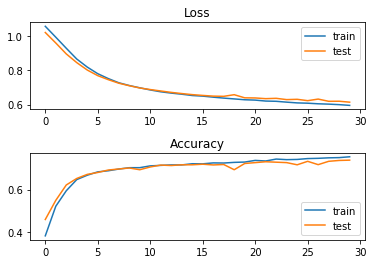

In [28]:
# Summary of the ANN model
summarize_model(Best_Model, Best_Model_hist, train_images, Train_labels, test_images_v2, Test_labels)

## Transfer Learning 

In [42]:
# To extract images
def get_images_transfer(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'mountain':
            label = 0
        elif labels == 'sea':
            label = 1
        elif labels == "street":
            label = 2
        else:
            continue
        print(label)
        try:
            for image_file in os.listdir(directory + labels): #Extracting the file name of the image from Class Label folder
                image = cv2.imread(directory + labels + r'/'+image_file) #Reading the image (OpenCV)
                image = cv2.resize(image, (150, 150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
                Images.append(image)
                Labels.append(label)
        except:
            print(".DS_Store is not a Not a Directory")
    return shuffle(Images,Labels,random_state = rd) #Shuffle the dataset you just prepared.

In [43]:
# To get the labels

def get_classlabel_transfer(class_code):
    labels = {2:'street', 0:'mountain', 1:'sea'}
    return labels[class_code]

In [44]:
# Extracting the train Images

Images_transfer, Labels_transfer = get_images_transfer('/Users/manojchowdary/Documents/Data_903.01_Analytics_Applications2/Prashant_Project/intel-image-classification/seg_train/') #Extract the training images from the folders.
Images_transfer = np.array(Images_transfer) #converting the list of images to numpy array.
Labels_transfer = np.array(Labels_transfer)

2
0
1


In [45]:
print(len(Images_transfer))
Labels_transfer

7168


array([2, 1, 2, ..., 2, 0, 1])

In [46]:
# Extracting the test Images

test_images_transfer,test_labels_transfer = get_images_transfer('/Users/manojchowdary/Documents/Data_903.01_Analytics_Applications2/Prashant_Project/intel-image-classification/seg_test/')
test_images_transfer = np.array(test_images_transfer)
test_labels_transfer = np.array(test_labels_transfer)

2
0
1


In [47]:
print("Shape of Images:",Images_transfer.shape)
print("Shape of Images:",test_images_transfer.shape)

Shape of Images: (7168, 150, 150, 3)
Shape of Images: (1536, 150, 150, 3)


In [48]:
# Reshaping the images

train_images_transfer = Images_transfer.reshape((7168, 150 * 150 * 3))
train_images_transfer = train_images_transfer.astype('float32') / 255
test_images_transfer_v2 = test_images_transfer.reshape((1536, 150 * 150 * 3)) 
test_images_transfer_v2 = test_images_transfer_v2.astype('float32') / 255

In [49]:
# convert labels to categorical (Data structure transformation)
# Converts a class vector (integers) to binary class matrix
# E.g. for use with categorical_crossentropy.

# ------------------------------------
# Caution: Run this cell only once
# ------------------------------------

from keras.utils import to_categorical

Train_labels_transfer = to_categorical(Labels_transfer)
Test_labels_transfer = to_categorical(test_labels_transfer)

print(Train_labels_transfer.shape)
print(Test_labels_transfer.shape)
Train_labels_transfer[2][1]

(7168, 3)
(1536, 3)


0.0

In [50]:
Train_labels_transfer

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [51]:
# Loading and Transfering the Model
Transfer_model = load_model('best_model.h5')

In [52]:
# 

Transfer_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

EarlyStop_Transfer = [EarlyStopping(monitor='val_loss', patience = 5, min_delta = 0.05, mode = min)]

In [53]:
# Training withe transfered model
Model_hist_transfer = Transfer_model.fit(train_images_transfer, Train_labels_transfer, epochs=10, batch_size=32, 
                             validation_data = (test_images_transfer_v2, Test_labels_transfer),
                            callbacks = EarlyStop_Transfer)

Train on 7168 samples, validate on 1536 samples
Epoch 1/10
7168/7168 [==============================] - 4s 493us/step - loss: 1.1139 - acc: 0.4007 - val_loss: 0.9722 - val_acc: 0.5111
Epoch 2/10
7168/7168 [==============================] - 2s 322us/step - loss: 0.9171 - acc: 0.5970 - val_loss: 0.8368 - val_acc: 0.6439
Epoch 3/10
7168/7168 [==============================] - 2s 285us/step - loss: 0.8303 - acc: 0.6243 - val_loss: 0.8788 - val_acc: 0.6165
Epoch 4/10
7168/7168 [==============================] - 2s 311us/step - loss: 0.7929 - acc: 0.6367 - val_loss: 0.7859 - val_acc: 0.6517
Epoch 5/10
7168/7168 [==============================] - 2s 315us/step - loss: 0.7718 - acc: 0.6413 - val_loss: 0.7654 - val_acc: 0.6595
Epoch 6/10
7168/7168 [==============================] - 2s 296us/step - loss: 0.7625 - acc: 0.6497 - val_loss: 0.7460 - val_acc: 0.6699
Epoch 7/10
7168/7168 [==============================] - 2s 273us/step - loss: 0.7543 - acc: 0.6487 - val_loss: 0.7354 - val_acc: 0.6725


Training data Evaluation
7168/7168 [==============================] - 1s 106us/step
[0.6890837072527835, 0.689453125]

Testing data Evaluation
1536/1536 [==============================] - 0s 109us/step
[0.7277746697266897, 0.6712239583333334]

Train loss: 0.689, Test loss: 0.728
Train Acc: 0.689, Test Acc: 0.671


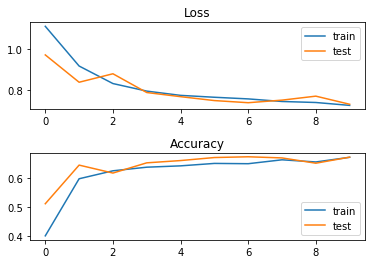

In [54]:
# Summary of results
summarize_model(Transfer_model, Model_hist_transfer, train_images_transfer, Train_labels_transfer, test_images_transfer_v2, Test_labels_transfer)


## CNN

In [11]:
epochs = 20
num_classes = 10

In [12]:
# To extract the images

def get_images_cnn(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'glacier':
            label = 2
        elif labels == 'mountain':
            label = 3
        elif labels == 'sea':
            label = 4
        elif labels == "street":
            label = 5
        else:
            continue
        print(label)
        try:
            for image_file in os.listdir(directory + labels): #Extracting the file name of the image from Class Label folder
                image = cv2.imread(directory + labels + r'/'+image_file) #Reading the image (OpenCV)
                image = cv2.resize(image, (150, 150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
                Images.append(image)
                Labels.append(label)
        except:
            print(".DS_Store is not a Not a Directory")
    return shuffle(Images,Labels,random_state = rd) #Shuffle the dataset you just prepared.

In [57]:
# To get the class labels

def get_classlabel_cnn(class_code):
    labels = {0:'buildings', 1:'forest', 2:'glacier', 3:'mountain', 4:'sea', 5: 'street'}
    return labels[class_code]

In [14]:
# Extracting the traning Images

Images_cnn, Labels_cnn = get_images_cnn('/Users/manojchowdary/Documents/Data_903.01_Analytics_Applications2/Prashant_Project/intel-image-classification/seg_train/') #Extract the training images from the folders.
Images_cnn = np.array(Images_cnn) #converting the list of images to numpy array.
Labels_cnn = np.array(Labels_cnn)


1
0
2
5
3
4


In [15]:
# Extracting the test images

test_images_cnn, test_labels_cnn = get_images_cnn('/Users/manojchowdary/Documents/Data_903.01_Analytics_Applications2/Prashant_Project/intel-image-classification/seg_test/')
test_images_cnn = np.array(test_images_cnn)
test_labels_cnn = np.array(test_labels_cnn)

1
0
2
5
3
4


In [16]:
print("Shape of Train Images:",Images_cnn.shape)
print("Shape of Train Labels:",Labels_cnn.shape)
print("Shape of Test Images:",test_images_cnn.shape)
print("Shape of Test Labels:",test_labels_cnn.shape)

Shape of Train Images: (14034, 150, 150, 3)
Shape of Train Labels: (14034,)
Shape of Test Images: (3000, 150, 150, 3)
Shape of Test Labels: (3000,)


In [18]:
test_labels_cnn

array([3, 2, 5, ..., 2, 3, 2])

In [96]:
# CNN Model

cnn_model = Sequential()

cnn_model.add(Conv2D(20, kernel_size = (3,3),activation='relu',input_shape = (150, 150, 3)))
cnn_model.add(Conv2D(15, kernel_size = (3,3),activation='relu'))
cnn_model.add(MaxPooling2D(3,3))
cnn_model.add(Conv2D(25, kernel_size = (3,3),activation='relu'))
cnn_model.add(Conv2D(15, kernel_size = (3,3),activation='relu'))
cnn_model.add(Conv2D(100, kernel_size = (3,3),activation='relu'))
cnn_model.add(Conv2D(50, kernel_size = (3,3),activation='relu'))
cnn_model.add(MaxPooling2D(3,3))
cnn_model.add(Flatten())
cnn_model.add(Dense(20, activation = 'relu'))
cnn_model.add(Dense(50, activation = 'relu'))
cnn_model.add(Dense(50, activation = 'relu'))
cnn_model.add(Dropout(rate=0.5))
cnn_model.add(Dense(6, activation='softmax'))

cnn_model.compile(optimizer = Adam(lr = 0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

cnn_model.summary()
SVG(model_to_dot(cnn_model, show_layer_names = True, show_shapes = True).create(prog = 'dot', format='svg'))
Utils.plot_model(cnn_model, to_file='model.png',show_shapes=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 148, 148, 20)      560       
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 146, 146, 15)      2715      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 48, 48, 15)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 46, 46, 25)        3400      
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 44, 44, 15)        3390      
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 42, 42, 100)       13600     
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 40, 40, 50)        45050     
__________

In [97]:
# Traning the Model

trained = cnn_model.fit(Images_cnn, Labels_cnn, epochs = 50, validation_data = (test_images_cnn, test_labels_cnn))


Train on 14034 samples, validate on 3000 samples
Epoch 1/50
14034/14034 [==============================] - 532s 38ms/step - loss: 1.7016 - acc: 0.2674 - val_loss: 1.5858 - val_acc: 0.3137
Epoch 2/50
14034/14034 [==============================] - 661s 47ms/step - loss: 1.5386 - acc: 0.3242 - val_loss: 1.3898 - val_acc: 0.3893
Epoch 3/50
14034/14034 [==============================] - 672s 48ms/step - loss: 1.3106 - acc: 0.4451 - val_loss: 1.1854 - val_acc: 0.4860
Epoch 4/50
14034/14034 [==============================] - 659s 47ms/step - loss: 1.1790 - acc: 0.4986 - val_loss: 1.0481 - val_acc: 0.5943
Epoch 5/50
14034/14034 [==============================] - 630s 45ms/step - loss: 1.0468 - acc: 0.5831 - val_loss: 0.9303 - val_acc: 0.6563
Epoch 6/50
14034/14034 [==============================] - 615s 44ms/step - loss: 0.9418 - acc: 0.6367 - val_loss: 0.8698 - val_acc: 0.6637
Epoch 7/50
14034/14034 [==============================] - 645s 46ms/step - loss: 0.8669 - acc: 0.6714 - val_loss: 0.8

In [99]:
# To check the results 
def summarize_cnn_model(model, hist, trainX, trainy, testX, testy):
    # evaluate the model
    print("Training data Evaluation")
    train_loss, train_acc = model.evaluate(trainX, trainy, verbose=1)
    print()
    print("Testing data Evaluation")
    test_loss, test_acc = model.evaluate(testX, testy, verbose=1)
    print()
    ## Below are just to see the lossess
    print('Train loss: %.3f, Test loss: %.3f' % (train_loss, test_loss))
    print('Train Acc: %.3f, Test Acc: %.3f' % (train_acc, test_acc))
    # plot loss during training
    plt.subplot(211)
    plt.subplots_adjust(hspace = 0.5)
    plt.title('Loss')
    plt.plot(hist.history['loss'], label='train')
    plt.plot(hist.history['val_loss'], label='test')
    plt.legend()
    # plot accuracy during training
    plt.subplot(212)
    plt.title('Accuracy')
    plt.plot(hist.history['acc'], label='train')
    plt.plot(hist.history['val_acc'], label='test')
    plt.legend()
    plt.show()

Training data Evaluation
14034/14034 [==============================] - 232s 17ms/step

Testing data Evaluation
3000/3000 [==============================] - 47s 16ms/step

Train loss: 0.070, Test loss: 1.366
Train Acc: 0.979, Test Acc: 0.741


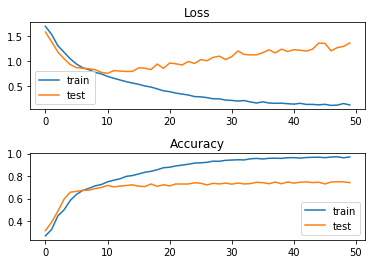

In [100]:
# Summary of models
summarize_cnn_model(cnn_model, trained, Images_cnn, Labels_cnn, test_images_cnn, test_labels_cnn)


In [101]:
# Extracting Images and Reshaping
def get_pred_images(direc):
    Images = []
    for image_file in os.listdir(direc): #Extracting the file name of the image from Class Label folder
        image = cv2.imread(direc + r'/' + image_file) #Reading the image (OpenCV)
        image = cv2.resize(image, (150, 150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
        Images.append(image)
    return(Images)

In [102]:
# Extracting the images to make predictions 
pred_images = get_pred_images('/Users/manojchowdary/Documents/Data_903.01_Analytics_Applications2/Prashant_Project/intel-image-classification/seg_pred/')
pred_images = np.array(pred_images)
pred_images.shape

(7301, 150, 150, 3)

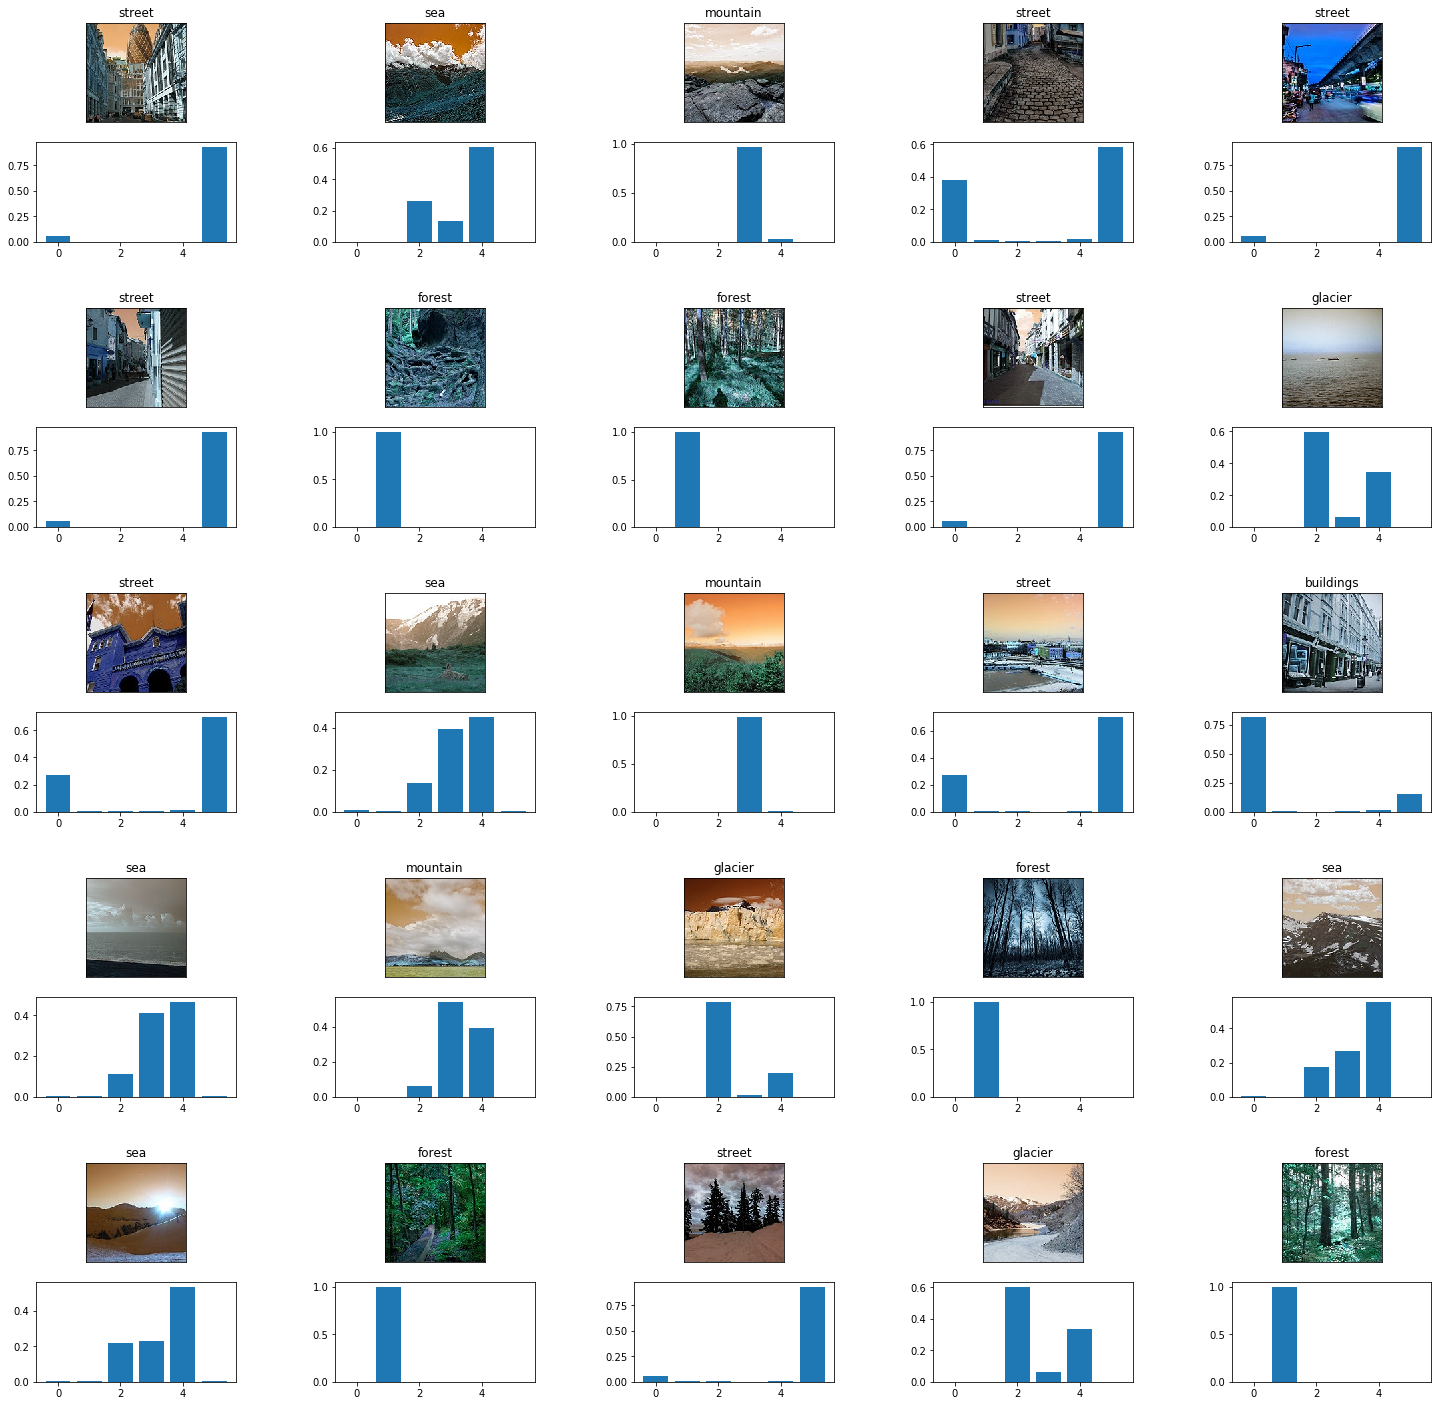

In [103]:
# Making predictions with CNN Model

fig = plt.figure(figsize=(25, 25))
outer = gridspec.GridSpec(5, 5, wspace=0.5, hspace=0.3)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.5, hspace=0.2)
    rnd_number = randint(0,len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    pred_class = get_classlabel_cnn(model.predict_classes(pred_image)[0])
    pred_prob = model.predict(pred_image).reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plt.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plt.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)


fig.show()

# labels = {0:'buildings', 1:'forest', 2:'glacier', 3:'mountain', 4:'sea', 5: 'street'}